# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [77]:
# Ignore warnings to enhance code readability
import warnings
warnings.filterwarnings("ignore")

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for better visibility of data
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Statistical Modeling and Machine Learning Libraries
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score
from sklearn import metrics

# Metrics for Model Evaluation
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# Set a seed for reproducibility
np.random.seed(42)

# Suppress ConvergenceWarning from statsmodels
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

# Function to evaluate and print model metrics
def evaluate_model(y_true, y_pred, y_prob):
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("\nAccuracy Score:", accuracy_score(y_true, y_pred))
    print("Precision Score:", precision_score(y_true, y_pred))
    print("Recall Score:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_true, y_prob))




## Data Overview

- Observations
- Sanity checks

In [2]:
learn = pd.read_csv("/content/ExtraaLearn.csv") ##  Complete the code to read the data

# copying data to another variable to avoid any changes to original data
df = learn.copy()

In [3]:
df.head() ##  Complete the code to view top 5 rows of the data

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [4]:
df.tail()##  Complete the code to view last 5 rows of the data

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


In [5]:
df.shape ## Complete the code to get the shape of data

(4612, 15)

**Observations:**

- **Data set contain in df** has 15 columns explaining the information of 4615 ExtraLearn leads. The last column is **status column** which will help us to build the classification model in the following sections of the code.



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

**Observations:**

- There are **4612 observations and 15 columns** in the dataset.
- All the columns have 4612 non-null values, i.e., **there are no missing values in the data.**
- ID, current_occupation, first_interaction profile_completed, last_activity,  print_media_type1, print_media_type2, digital_media, educational_channels, and referral are objects which will have an special treatment in the future (dummy variables).
- Age, website_visits, time_spent_on_website, and status are saved as int64.
- page_views_per_visit is saved as float64.


In [7]:
# Checking the count of unique values in each column
df.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

**Observations:**

- **ID is an identifier** which is unique for each employee, and **we can drop this column** as it would not add any value to our analysis.



## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

**Statistical summary of the data.**

In [8]:
df.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.00000,4612.00000,4612.00000,4612.00000,4612.00000
mean,46.20121,3.56678,724.01127,3.02613,0.29857
std,13.16145,2.82913,743.82868,1.96812,0.45768
min,18.00000,0.00000,0.00000,0.00000,0.00000
25%,36.00000,2.00000,148.75000,2.07775,0.00000
50%,51.00000,3.00000,376.00000,2.79200,0.00000
75%,57.00000,5.00000,1336.75000,3.75625,1.00000
max,63.00000,30.00000,2537.00000,18.43400,1.00000


**Observations:**

- **Average Lead age is around 46 years**. It has a high range, from 18 years to 63, indicating good age diversity in the lead dataset.
- **At least 50% of the leads have visited the webpage 3 times**. However, there are some extreme values, given that the maximum value is 30.
- **The average time spend on the webpage is 724 min.** It has a high range of values from 0-2537 min, this variable which could indicate **lead interest** in the following analysis.
- **The average page views per visit is around 3 views.** At least 75% of leads have 2 views of the webpage.
- **On average, status is ~0.298**. Which means the actual conversion rate of this leads list is around 30%.


In [9]:
# Making a list of all catrgorical variables
cat_col = list(df.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 50)

EXT001     1
EXT2884    1
EXT3080    1
EXT3079    1
EXT3078    1
          ..
EXT1537    1
EXT1536    1
EXT1535    1
EXT1534    1
EXT4612    1
Name: ID, Length: 4612, dtype: int64
--------------------------------------------------
Professional    2616
Unemployed      1441
Student          555
Name: current_occupation, dtype: int64
--------------------------------------------------
Website       2542
Mobile App    2070
Name: first_interaction, dtype: int64
--------------------------------------------------
High      2264
Medium    2241
Low        107
Name: profile_completed, dtype: int64
--------------------------------------------------
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: last_activity, dtype: int64
--------------------------------------------------
No     4115
Yes     497
Name: print_media_type1, dtype: int64
--------------------------------------------------
No     4379
Yes     233
Name: print_media_type2, dtype: int64
--------------------

In [10]:
# Making a list of all categorical variables
cat_col = list(df.select_dtypes("object").columns)

# Print the count of each unique value in the "ID" column
id_column = "ID"
print(df[id_column].value_counts())
print("-" * 50)

# Print the percentage of each unique value in other categorical columns
for column in cat_col:
    if column != id_column:
        total_count = len(df[column])
        value_counts = df[column].value_counts()

        # Print column name
        print(f"\n{column}:")

        # Calculate and print percentage for each unique value
        for value, count in value_counts.items():
            percentage = (count / total_count) * 100
            print(f"{value}: {percentage:.2f}%")

        print("-" * 50)



EXT001     1
EXT2884    1
EXT3080    1
EXT3079    1
EXT3078    1
          ..
EXT1537    1
EXT1536    1
EXT1535    1
EXT1534    1
EXT4612    1
Name: ID, Length: 4612, dtype: int64
--------------------------------------------------

current_occupation:
Professional: 56.72%
Unemployed: 31.24%
Student: 12.03%
--------------------------------------------------

first_interaction:
Website: 55.12%
Mobile App: 44.88%
--------------------------------------------------

profile_completed:
High: 49.09%
Medium: 48.59%
Low: 2.32%
--------------------------------------------------

last_activity:
Email Activity: 49.39%
Phone Activity: 26.76%
Website Activity: 23.85%
--------------------------------------------------

print_media_type1:
No: 89.22%
Yes: 10.78%
--------------------------------------------------

print_media_type2:
No: 94.95%
Yes: 5.05%
--------------------------------------------------

digital_media:
No: 88.57%
Yes: 11.43%
--------------------------------------------------

education

**Observations:**

- Data distribution among categories in **current_occupation** variable is:Professional: 56.72%, Unemployed: 31.24% and, Student: 12.03%

- Data distribution among categories in **first_interaction** variable is:
Website: 55.12%, Mobile App: 44.88%. Which means the first interaction was online either via website or Mobile App.

- Data distribution among categories in **profile_completed** variable is: High: 49.09%, Medium: 48.59%, and Low: 2.32%. Which suggests most of the leads have a High or Medium profile completion.

- Data distribution among categories in **last_activity:** variable is: Email Activity: 49.39%, Phone Activity: 26.76%, and Website Activity: 23.85%. Which suggests most interactions were performed online.

- Data distribution among categories in **print_media_type1** variable is:
No: 89.22%, Yes: 10.78%. This reinforces the hypothesis that the most effective way to do marketing is online.  

- Data distribution among categories in **print_media_type2** variable is:
No: 94.95%, Yes: 5.05%. This reinforces the hypothesis that the most effective way to do marketing is online.  

-  Data distribution among categories in **digital_media** variable is:
digital_media:No: 88.57%, Yes: 11.43%. Even though the number of "yes" is not extremely big, is higher than print media 1 and 2. This reinforces the hypothesis that the most effective way to do marketing is online.  
  

- Data distribution among categories in **educational_channels** variable is:
No: 84.71%, Yes: 15.29%. This indicates that education channels like online forums, discussion threads, educational websites, etc., have been the way in which more leads were generated.

- Data distribution among categories in **referral** variable is: No: 97.98%
, and Yes: 2.02%. Referrals have not had a huge impact on ExtraLearn awareness.  



In [11]:
# checking the number of unique values
df["ID"].nunique() # Complete the code to check the number of unique values

4612

In [12]:
df.drop(["ID"], axis=1, inplace=True)

### Univariate Analysis


### Observations on age

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observations on website_visits

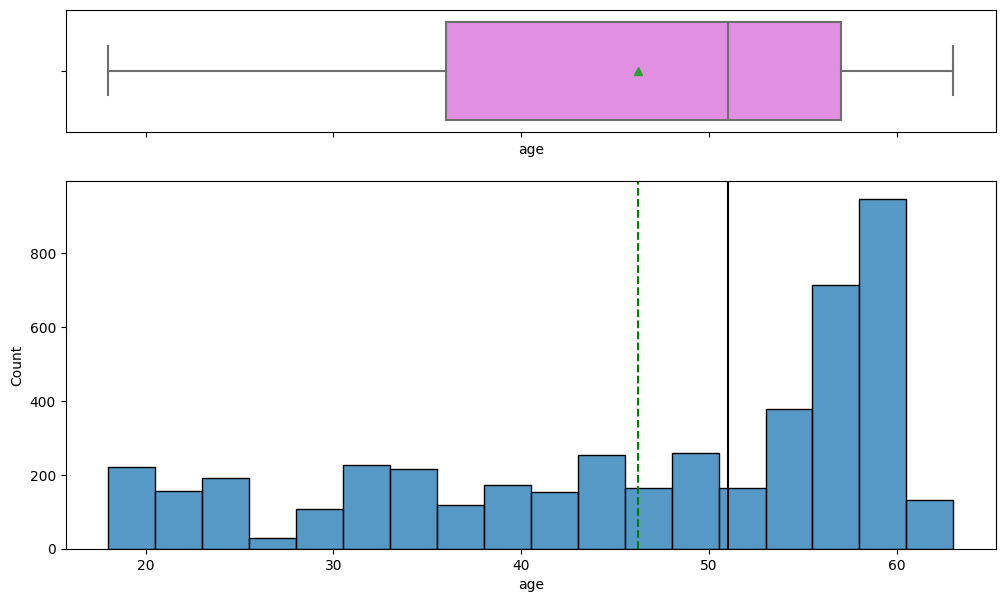

In [14]:
# run the function to plot a boxplot and a histogram of age
histogram_boxplot(df, "age")

**Observation:**
- The distribution is left skewed with the median lying around 51.

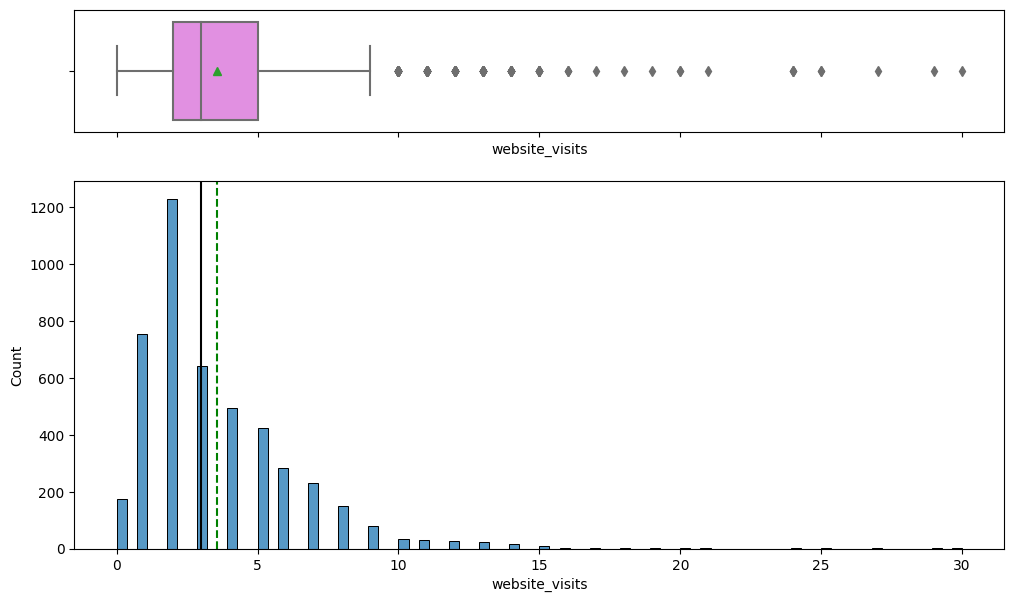

In [15]:
# run the function to plot a boxplot and a histogram of website_visits
histogram_boxplot(df, "website_visits")

**Observation:**
- The distribution is slightly right skewed with the mean lying around 3.5, and the median of 3.


In [16]:
# To check how many leads have not visited web-site
no_visit = df[df["website_visits"] == 0].shape
no_visit

(174, 14)

In [17]:
# This code selects rows where website_visits is 0 from the DataFrame df and stores it in the variable no_visit_info
# Then, it computes summary statistics of no_visit_info using the describe() method and prints the result

no_visit_info = df[df["website_visits"] == 0]
no_visit_info.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,174.00000,174.00000,174.00000,174.00000,174.00000
mean,47.50000,0.00000,0.00000,0.00000,0.18391
std,12.87815,0.00000,0.00000,0.00000,0.38853
min,18.00000,0.00000,0.00000,0.00000,0.00000
25%,37.25000,0.00000,0.00000,0.00000,0.00000
50%,54.00000,0.00000,0.00000,0.00000,0.00000
75%,58.00000,0.00000,0.00000,0.00000,0.00000
max,63.00000,0.00000,0.00000,0.00000,1.00000


**Observation:**
- 174 leads did not visit the web page.
- Among the leads how did not visit the webpage the conversion rate is significantly lower it is just 18.391% compared to the 29.8% of the overall leads.
- The age of the lead who did not visit the web page is very similar to the entire dataset.


### Observations on number of time_spent_on_website

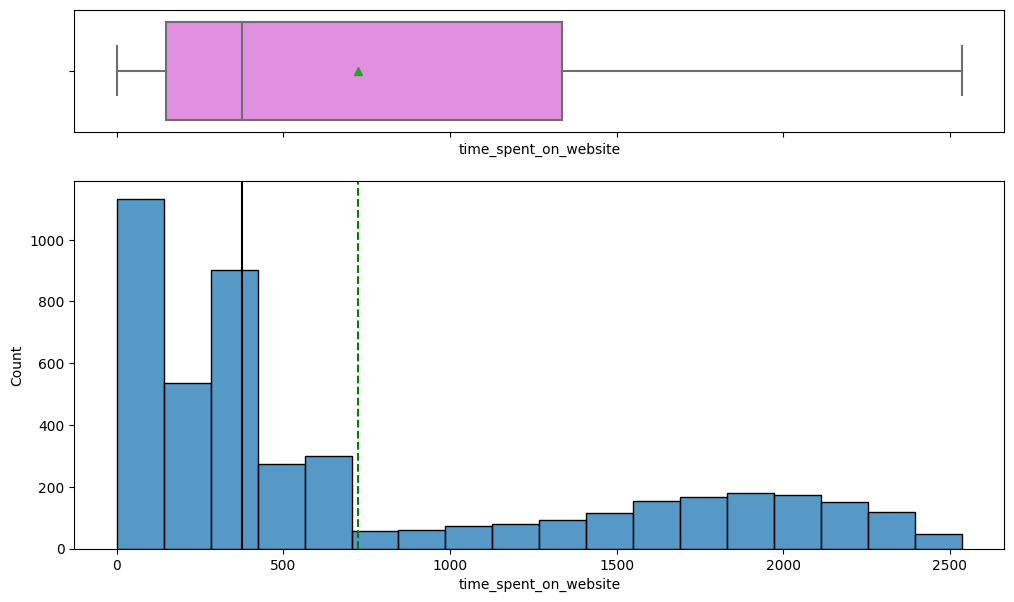

In [18]:
# run the function to plot a boxplot and a histogram of website_visits
histogram_boxplot(df, "time_spent_on_website")

**Observation:**
- The distribution is right skewed with the median lying around 376 min.

### Observations on number of page_views_per_visit

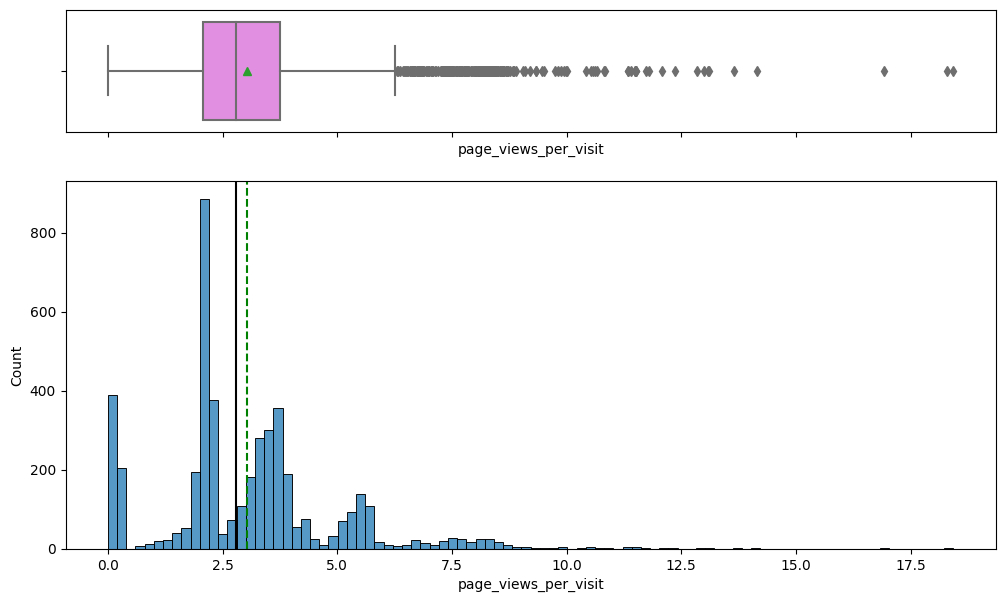

In [19]:
# run the function to plot a boxplot and a histogram of page_views_per_visit
histogram_boxplot(df, "page_views_per_visit")

**Observation:**
- The distribution is multi modal distribution with 4 main information clusters: near 0, around 2.4, 2.8 and 5.4. It has a median lying around 2.79.

### Observations on categorical variables

In [20]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on current ocupation

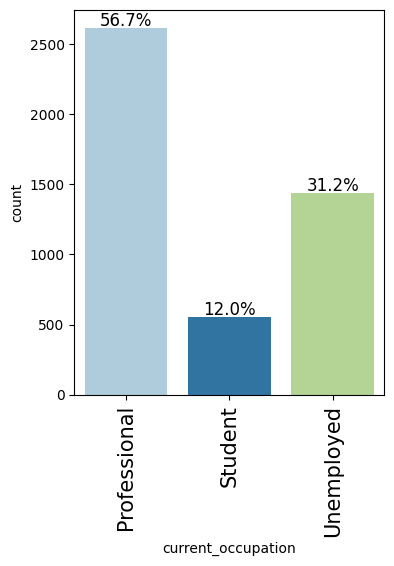

In [21]:
# run the function to plot a boxplot and a histogram of current_occupation
labeled_barplot(df, "current_occupation", perc=True)

**Observations:**

- Data distribution among categories in **current_occupation** variable is: Professional: 56.72%, Unemployed: 31.24% and, Student: 12.03%. Suggesting most of the leads are either professionals who want to improve their skills or unemployed who search to create new skills and then find a new job.



### Observations on number of first_interaction

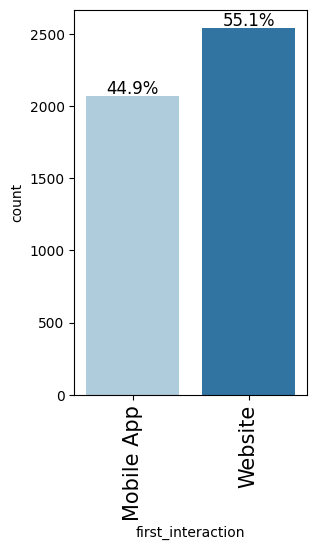

In [22]:
# run the function to plot a boxplot and a histogram of first_interaction
labeled_barplot(df, "first_interaction", perc=True)

**Observations:**


- Data distribution among categories in **first_interaction** variable is:
Website: 55.12%, Mobile App: 44.88%. Which means the first interaction was online either via website or Mobile App.


### Observations on number of profile_completed

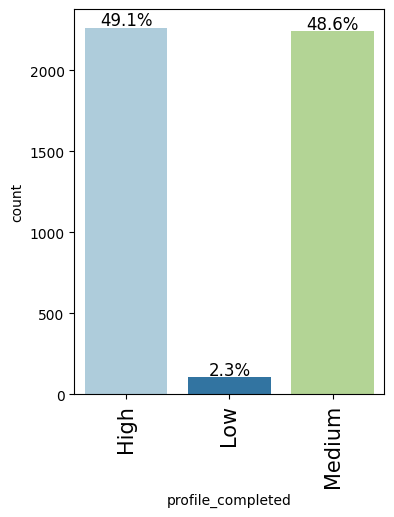

In [23]:
# run the function to plot a boxplot and a histogram of profile_completed
labeled_barplot(df, "profile_completed", perc=True)

**Observations:**

- Data distribution among categories in **profile_completed** variable is: High: 49.09%, Medium: 48.59%, and Low: 2.32%. Which suggests most of the leads have either a High or Medium profile completion.



### Observations on last_activity

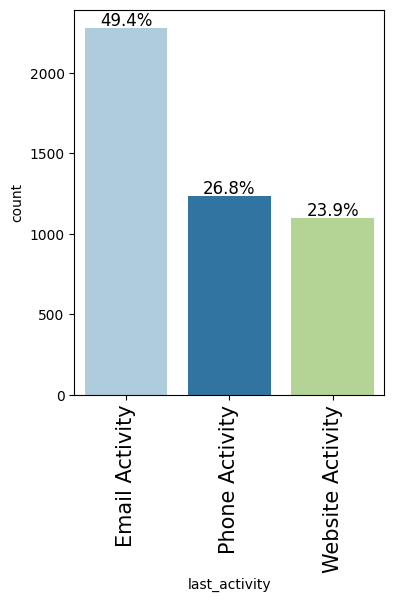

In [24]:
# run the function to plot a boxplot and a histogram of last_activity
labeled_barplot(df, "last_activity", perc=True)

- Data distribution among categories in **last_activity:** variable is: Email Activity: 49.39%, Phone Activity: 26.76%, and Website Activity: 23.85%. Which suggests most interactions were performed online.

### Observations on print_media_type1

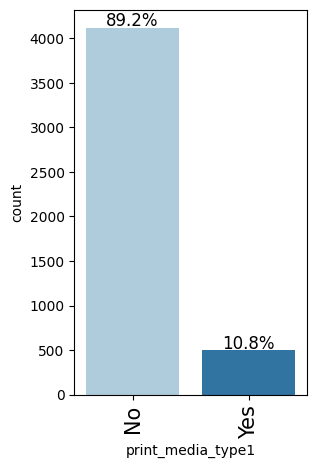

In [25]:
# run the function to plot a boxplot and a histogram of print_media_type1
labeled_barplot(df, "print_media_type1", perc=True)

**Observations:**


- Data distribution among categories in **print_media_type1** variable is:
No: 89.22%, Yes: 10.78%. This reinforces the hypothesis that the most effective way to do marketing is online.  


### Observations on print_media_type2

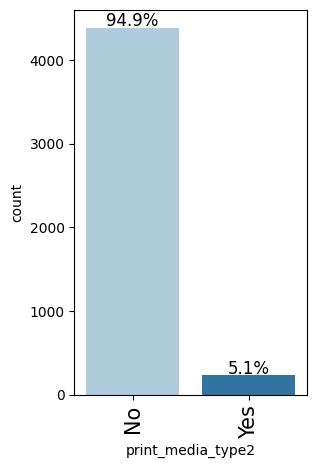

In [26]:
# run the function to plot a boxplot and a histogram of print_media_type2
labeled_barplot(df, "print_media_type2", perc=True)

**Observations:**

- Data distribution among categories in **print_media_type2** variable is:
No: 94.95%, Yes: 5.05%. This reinforces the hypothesis that the most effective way to do marketing is online.  


### Observations on digital_media



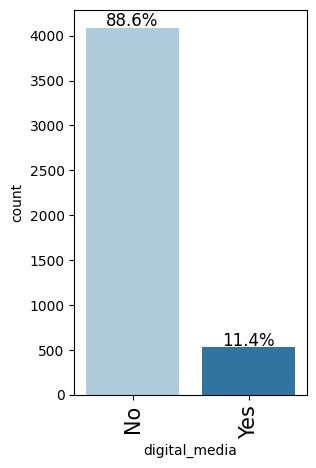

In [27]:
# run the function to plot a boxplot and a histogram of digital_media
labeled_barplot(df, "digital_media", perc=True)

**Observations:**
-  Data distribution among categories in **digital_media** variable is:
digital_media:No: 88.57%, Yes: 11.43%. Even though the number of "yes" is not extremely big, is higher than print media 1 and 2. This reinforces the hypothesis that the most effective way to do marketing is online.


### Observations on educational_channels

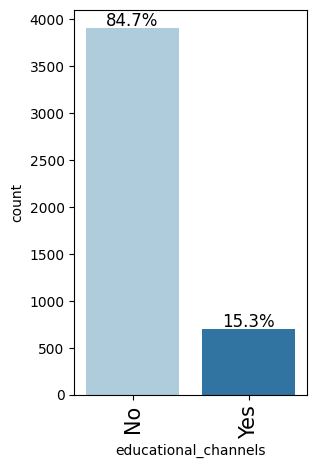

In [28]:
# run the function to plot a boxplot and a histogram of educational_channels
labeled_barplot(df, "educational_channels", perc=True)

**Observations:**
- Data distribution among categories in **educational_channels** variable is: No: 84.71%, Yes: 15.29%. This indicates that education channels like online forums, discussion threads, educational websites, etc., have been the way in which more leads were generated.


### Observations on referral

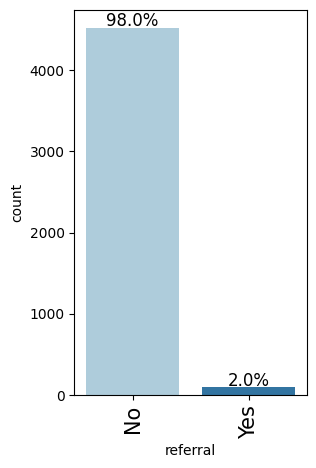

In [29]:
# run the function to plot a boxplot and a histogram of referral
labeled_barplot(df, "referral", perc=True)

**Observations:**

- Data distribution among categories in **referral** variable is: No: 97.98%
, and Yes: 2.02%. Referrals have not had a huge impact on ExtraLearn awareness.  


### Observations on status

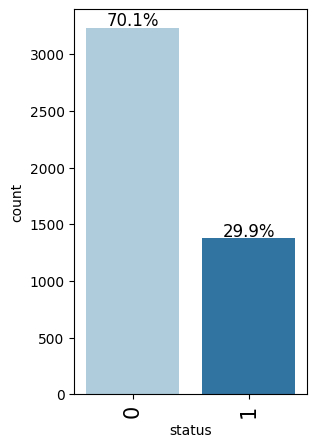

In [30]:
# run the function to plot a boxplot and a histogram of status
labeled_barplot(df, "status", perc=True)

**Observations:**

- **Edtech has a conversion rate of 29.9%, we need more information about its competitors to stablish whether or not this conversion rate is high enough.**


### Bivariate Analysis

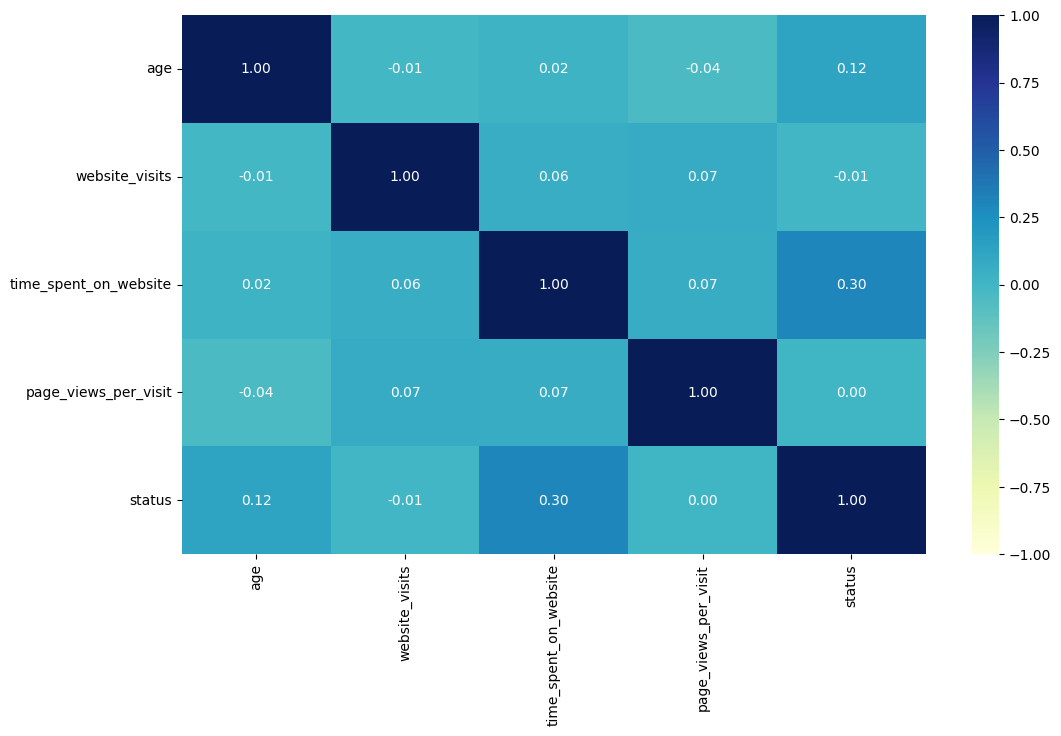

In [31]:
# Select numerical columns
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# Create a heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="YlGnBu"
)
plt.show()

**Observations:**
- **Status and time spent on website** are highly positively correlated (0.3). which means the more time a lead spends on the website the higher the conversion probability.
- **Status and age** are slightly positively correlated (0.12). which could be explained by the fact that older people have more money to buy the programs.
- There is not much correlation among the rest of the variables.



### Relationship between key categorical variables

In [32]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    """
    Plotting distributions of a predictor variable with respect to a target variable

    :param data: The dataset
    :param predictor: The name of the predictor variable
    :param target: The name of the target variable
    :return: None
    """

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    """
    Get the unique values of the target variable
    """

    target_uniq = data[target].unique()

    """
    Plot the distribution of the predictor variable for each unique value of the target variable
    """

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    """
    Plot a boxplot of the predictor variable with respect to the target variable
    """

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    """
    Plot a boxplot of the predictor variable with respect to the target variable, but without outliers
    """

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    """
    Adjust the layout of the subplots
    """

    plt.tight_layout()

    """
    Show the plot
    """

    plt.show()


In [33]:
# Print the category counts and plot a stacked bar chart.

def stacked_barplot(data, predictor, target):

    """
    Print the category counts and plot a stacked bar chart.

    Args:
        data: (DataFrame) The dataset
        predictor: (str) The name of the predictor variable
        target: (str) The name of the target variable
    """

    """
    Count the number of unique values in the predictor variable
    """
    count = data[predictor].nunique()

    """
    Get the last value of the target variable in descending order for sorting
    """
    sorter = data[target].value_counts().index[-1]

    """
    Create a crosstab table, sort it by the last value of the target variable in descending order, and include margins
    """
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )

    """
    Print the crosstab table
    """
    print(tab1)

    """
    Create a crosstab table, normalize the data by index, and sort it by the last value of the target variable in descending order
    """
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )

    """
    Plot a stacked bar chart
    """
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))

    """
    Set the legend location to the lower left corner, add a frame, and display the legend
    """
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

    """
    Show the plot
    """
    plt.show()


### Observations on current_occupation vs. status

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555


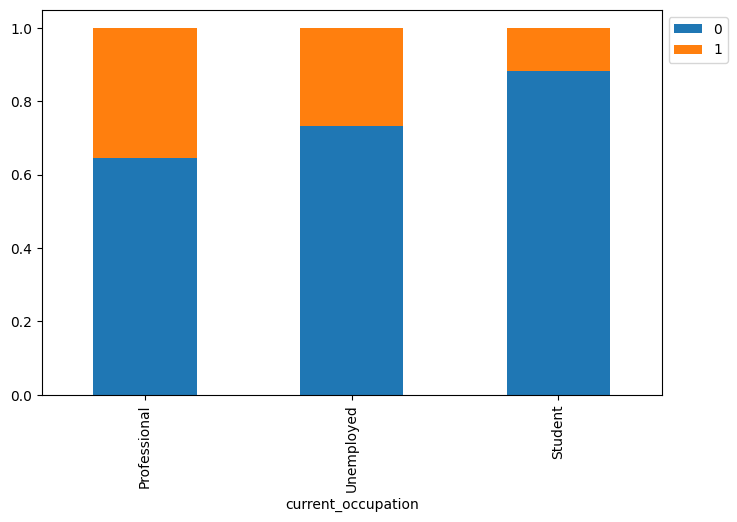

In [34]:
# Print the category counts and plot a stacked bar chart of
# the current occupation distribution across different statuses
stacked_barplot(df, "current_occupation", "status")

**Observations:**

- **Professionals** make up the largest number of leads at 2616, with a conversion rate of 35.5% (929 converted out of 2616).
- **Unemployed** have the second most leads at 1441, but a lower conversion rate of 26.6% (383 converted out of 1441).

- **Students** have the fewest leads at 555, but also the lowest conversion rate of only 11.7% (65 converted out of 555).

### Observations on current_occupation vs. age

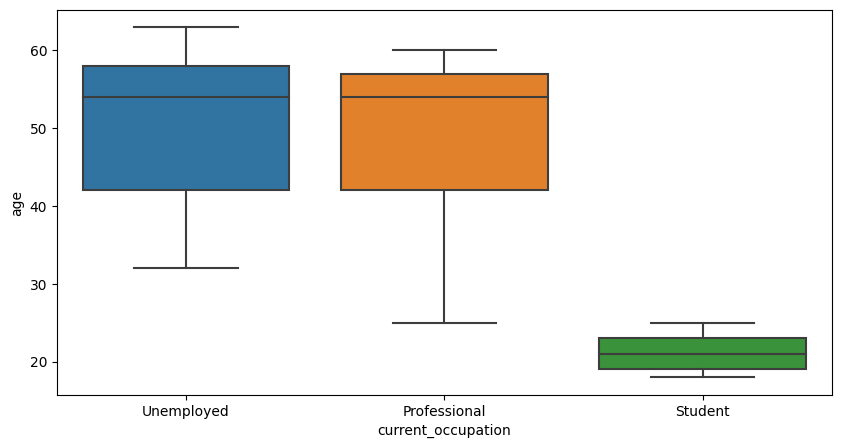

In [35]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x="current_occupation", y="age", data=df)
plt.show()

In [36]:
df.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.00000,49.34748,9.89074,25.00000,42.00000,54.00000,57.00000,60.00000
Student,555.00000,21.14414,2.00111,18.00000,19.00000,21.00000,23.00000,25.00000
Unemployed,1441.00000,50.14018,9.99950,32.00000,42.00000,54.00000,58.00000,63.00000


**Observations:**

- **Professionals and Unemployed** have a median age around 54 years old. This could be related to demand for execute education.

- **Students** as expected have a median age of 21 years old, with low data dispersion, the age range is between 18 and 25 years old. This segment could demand education to find the first job.  


### Observations on first_interaction vs. status

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070


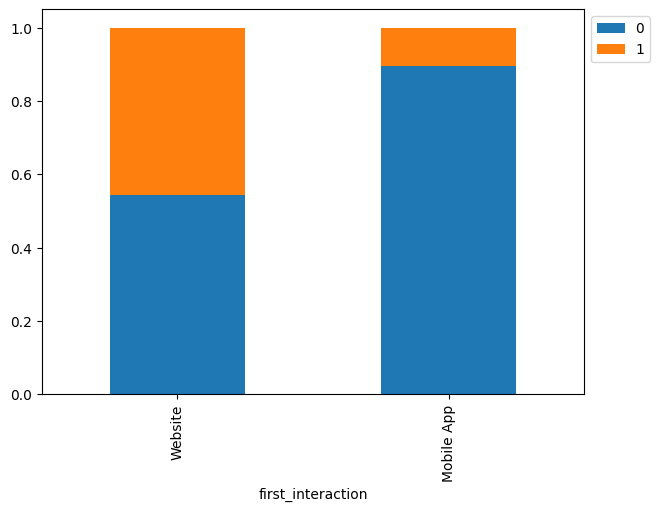

In [37]:
# Print the category counts and plot a stacked bar chart of
# the current occupation first_interaction and status
stacked_barplot(df, "first_interaction", "status")

**Observations:**
- A higher proportion of leads who first interacted on the **website** (1,159 out of 2,542) converted to clients compared to those who first interacted through the **mobile app** (218 out of 2,070).
- The conversion rate for the **website** interaction is 45.6% (1,159 / 2,542), while the conversion rate for the **mobile app** interaction is 10.5% (218 / 2,070).
- Overall Conversion Rate: The overall conversion rate in the dataset is 29.8% (1,377 / 4,612), indicating that approximately 30% of leads have converted to clients.

### Observations on time_spent_on_website vs. status

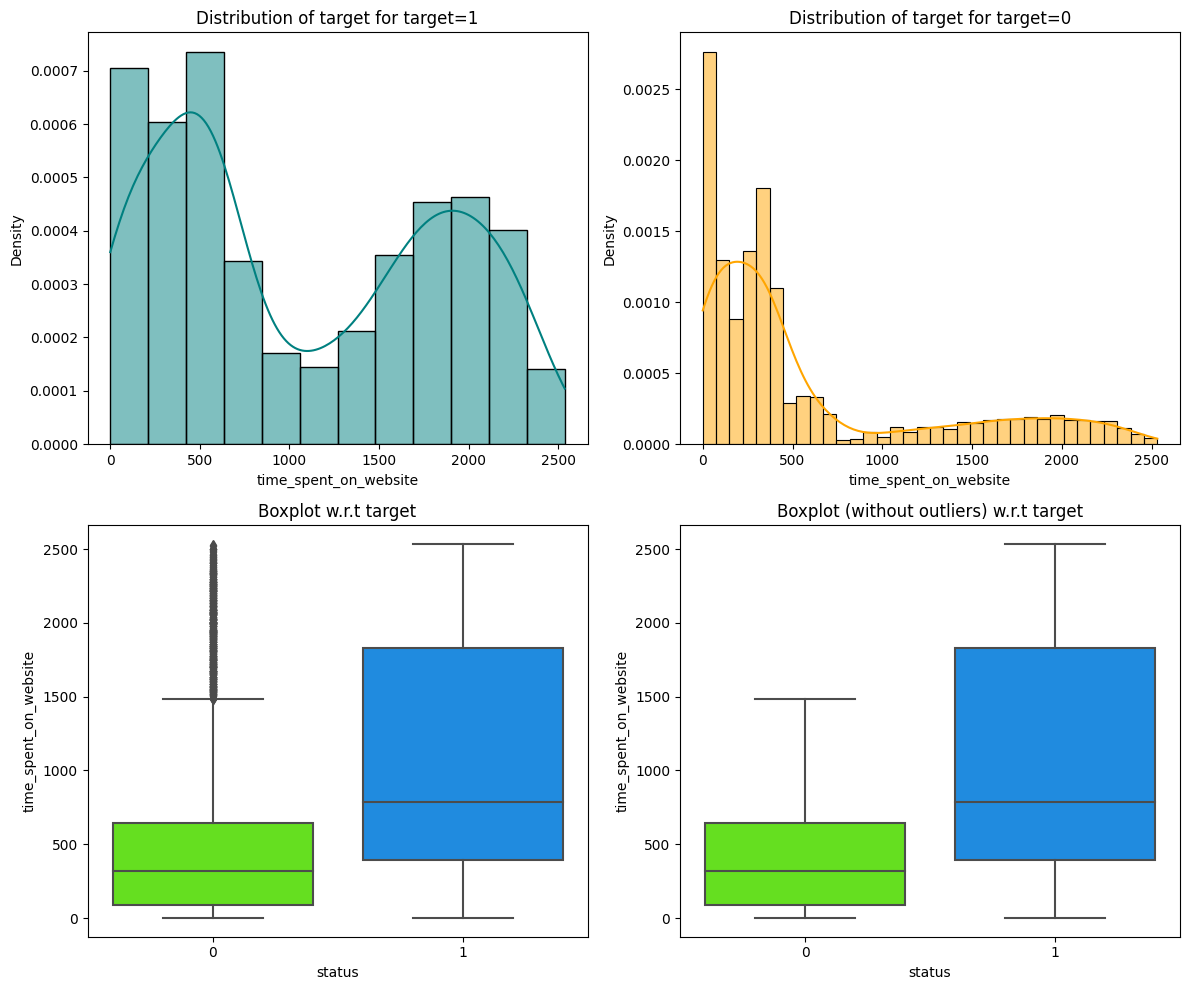

In [38]:
# Print distribution and boxplot by category
distribution_plot_wrt_target(df, "time_spent_on_website", "status")

In [39]:
# checking the median value
df.groupby(["status"])["time_spent_on_website"].median()

status
0   317.00000
1   789.00000
Name: time_spent_on_website, dtype: float64

**Observations:**
- The time spend on the website distribution for the **converted leads** is bimodal with high density around 500 and 2000 min; on the other side, the time spend on the website distribution for the **no converted leads** is right skewed with the median lying around 300 min.

- **Overall time spend on the website is higher for converted (median equals 789 min) leads than for no converted leads (median equals 317 min).**

### Observations  on website visits vs. status.

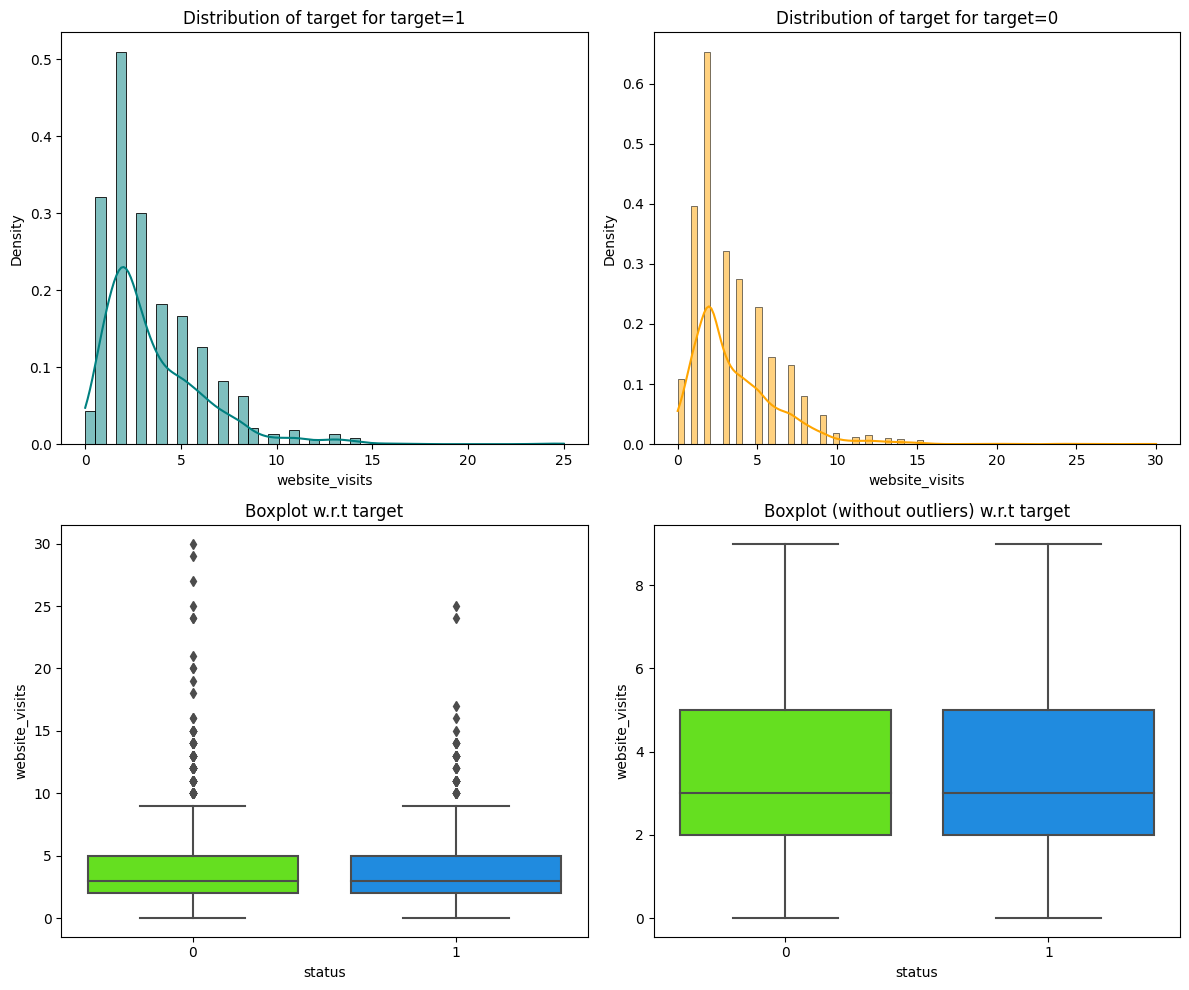

In [40]:
# Print distribution and boxplot by category
distribution_plot_wrt_target(df, "website_visits", "status")

**Observations:**
- As expected, given the low correlation (-0.01) Website visits do not seem to have an important impact on status.  

### Observations on page_views_per_visit vs. status.

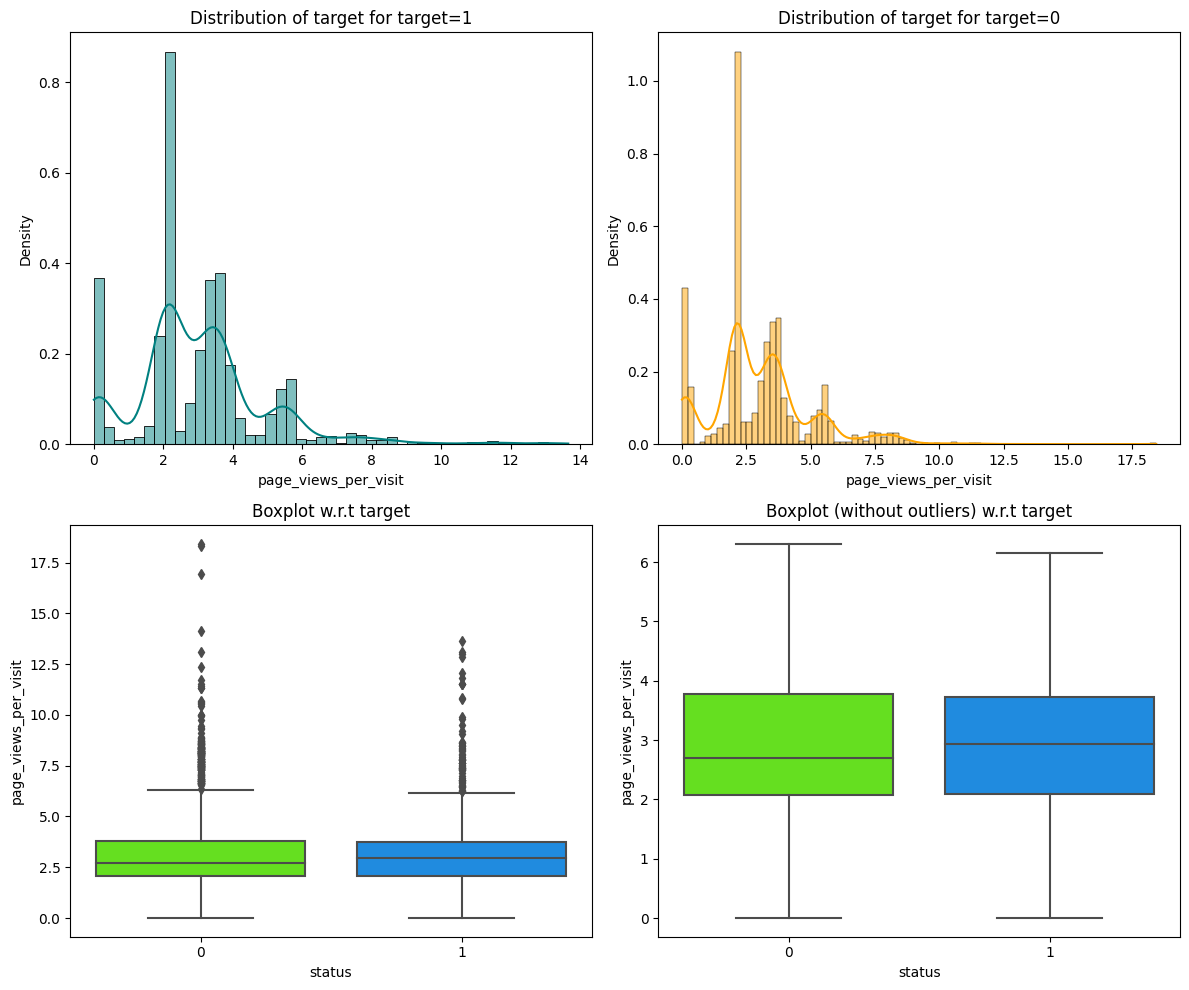

In [41]:
# Print distribution and boxplot by category
distribution_plot_wrt_target(df, "page_views_per_visit", "status")

**Observations:**
- As expected, given the low correlation (0.00) page_views_per_visit does not seem to have an important impact on status.  

### Observations on profile_completed vs. status.

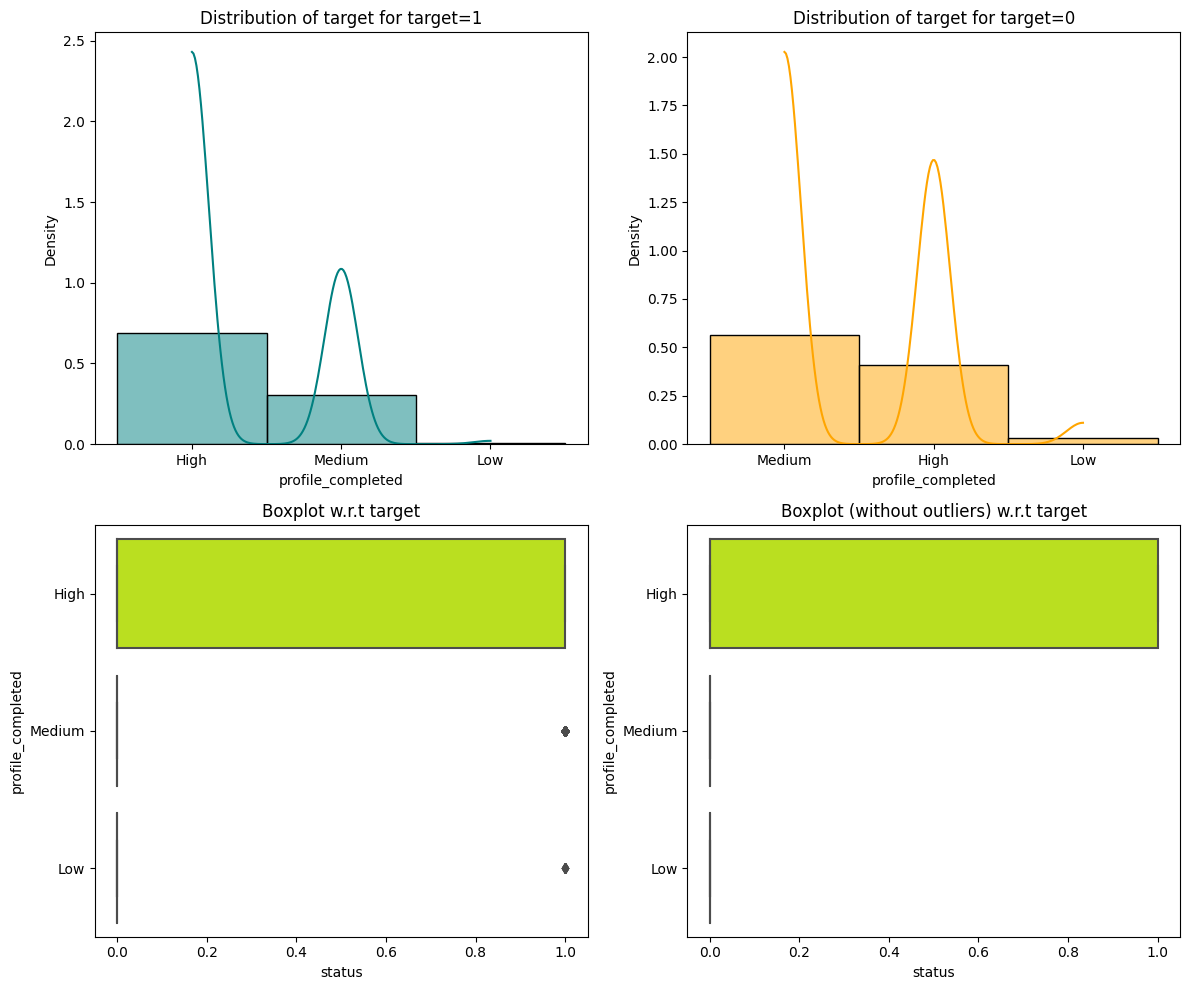

In [42]:
# Print distribution and boxplot by category
distribution_plot_wrt_target(df, "profile_completed", "status")

**Observations:**
- Profile completion Density distribution is **higher** for high in converted leads than in no converted leads.
  

### Observations on last_activity vs. status.

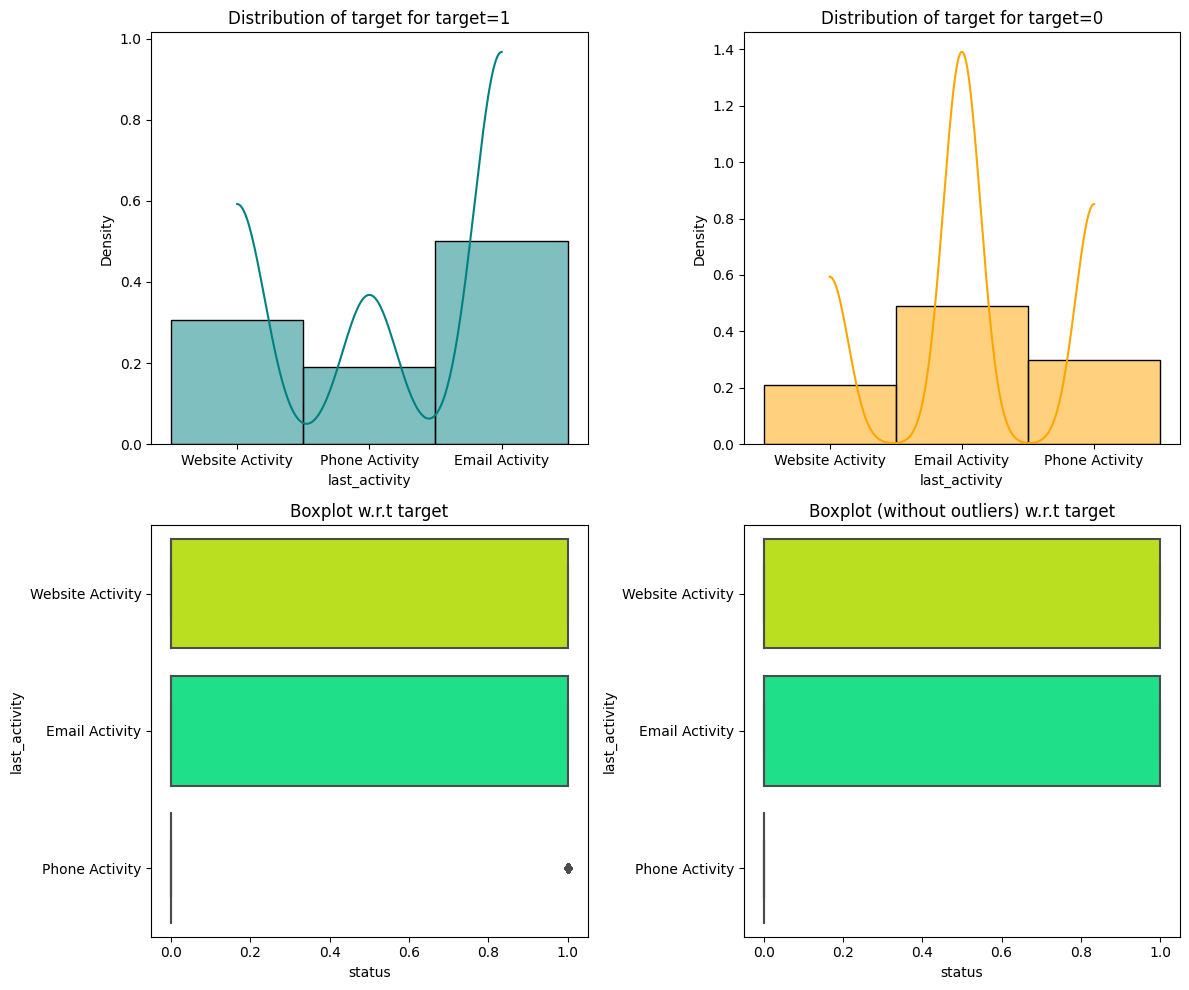

In [43]:
# Print distribution and boxplot by category
distribution_plot_wrt_target(df, "last_activity", "status")

**Observations:**
- Last activity Density distribution is slightly higher for  **email and website** in converted leads than in no converted leads.



### Observations on type of media awareness vs. status.

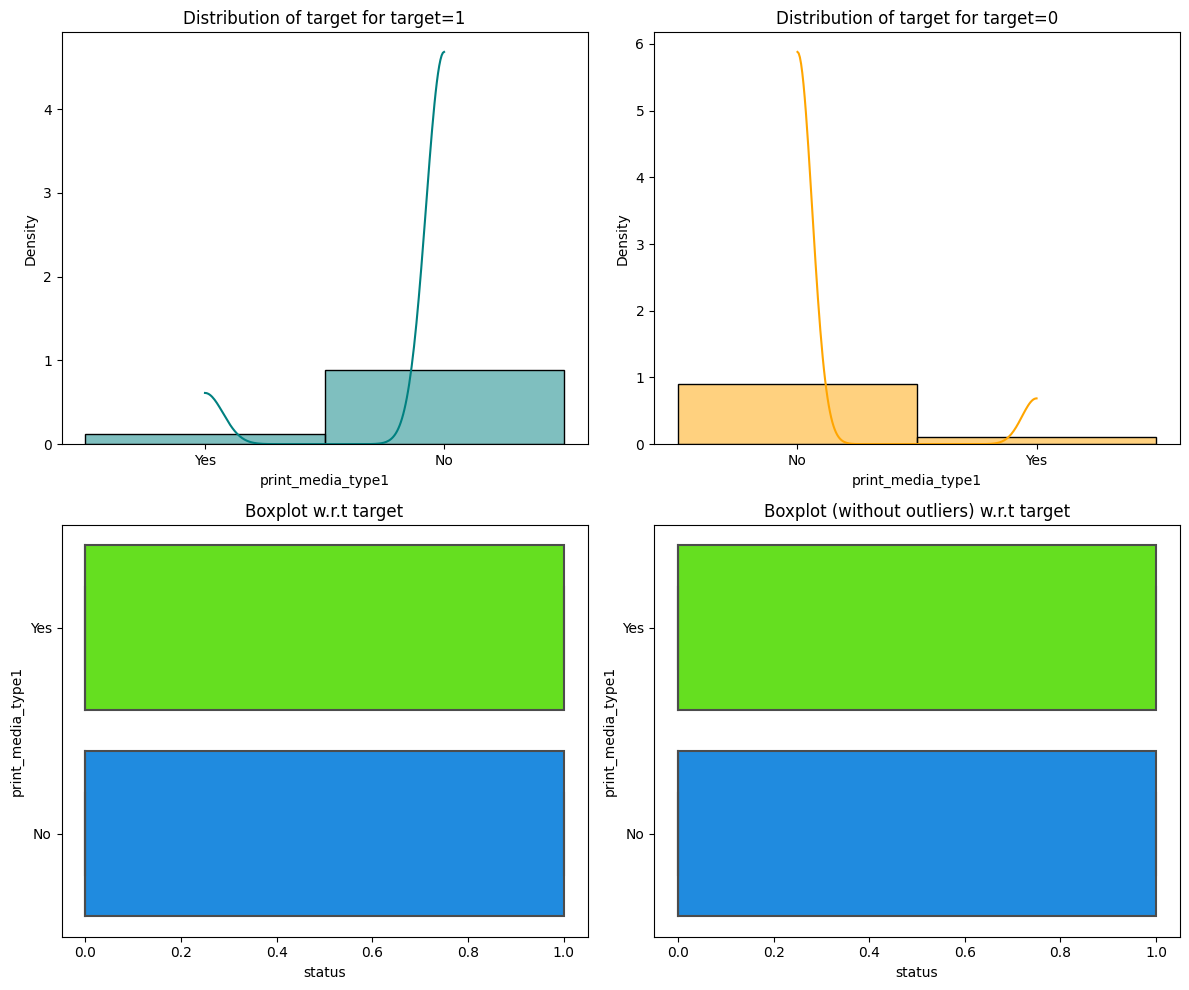

In [44]:
# Print distribution and boxplot by category
distribution_plot_wrt_target(df, "print_media_type1", "status")

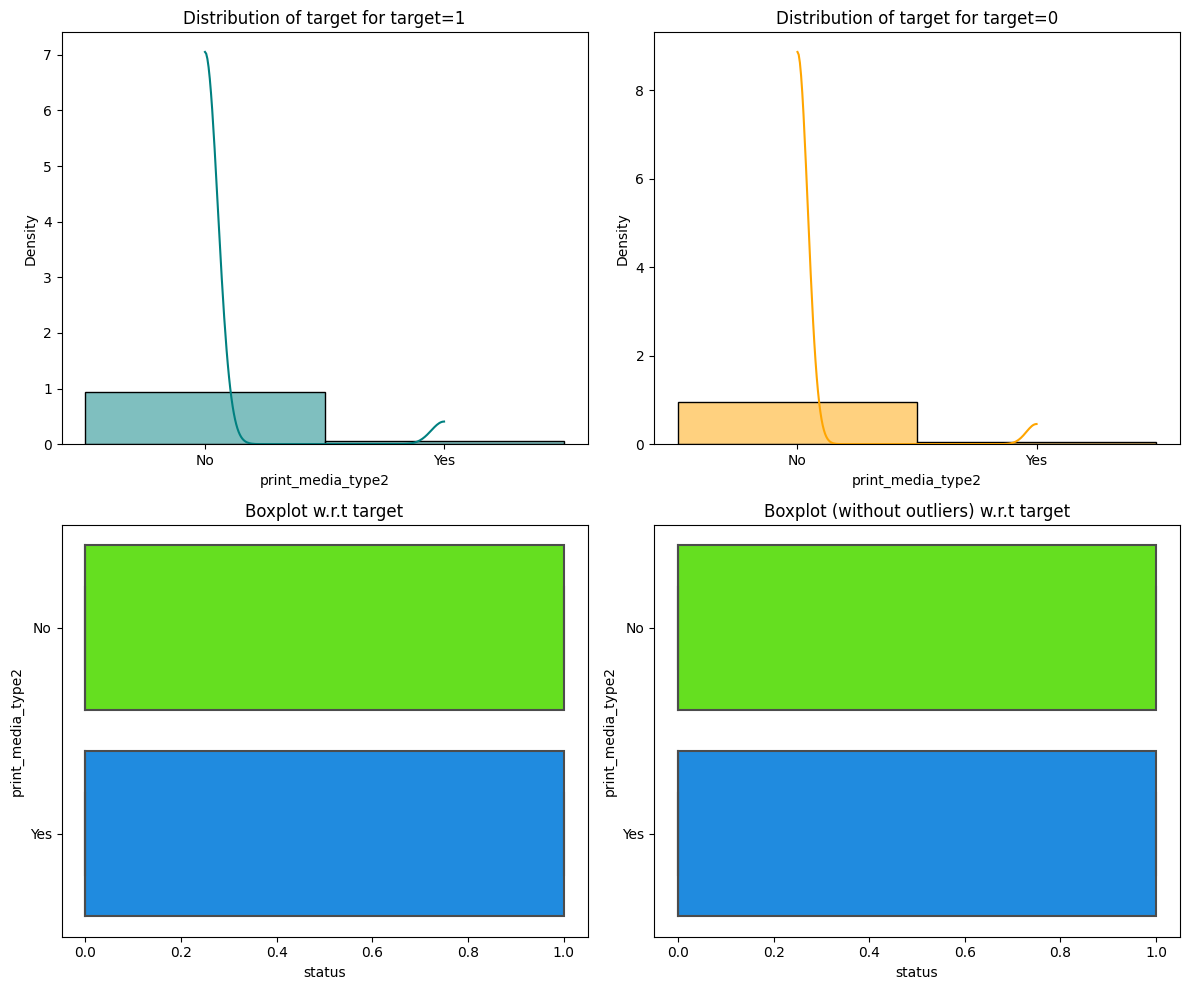

In [45]:
# Print distribution and boxplot by category
distribution_plot_wrt_target(df, "print_media_type2", "status")

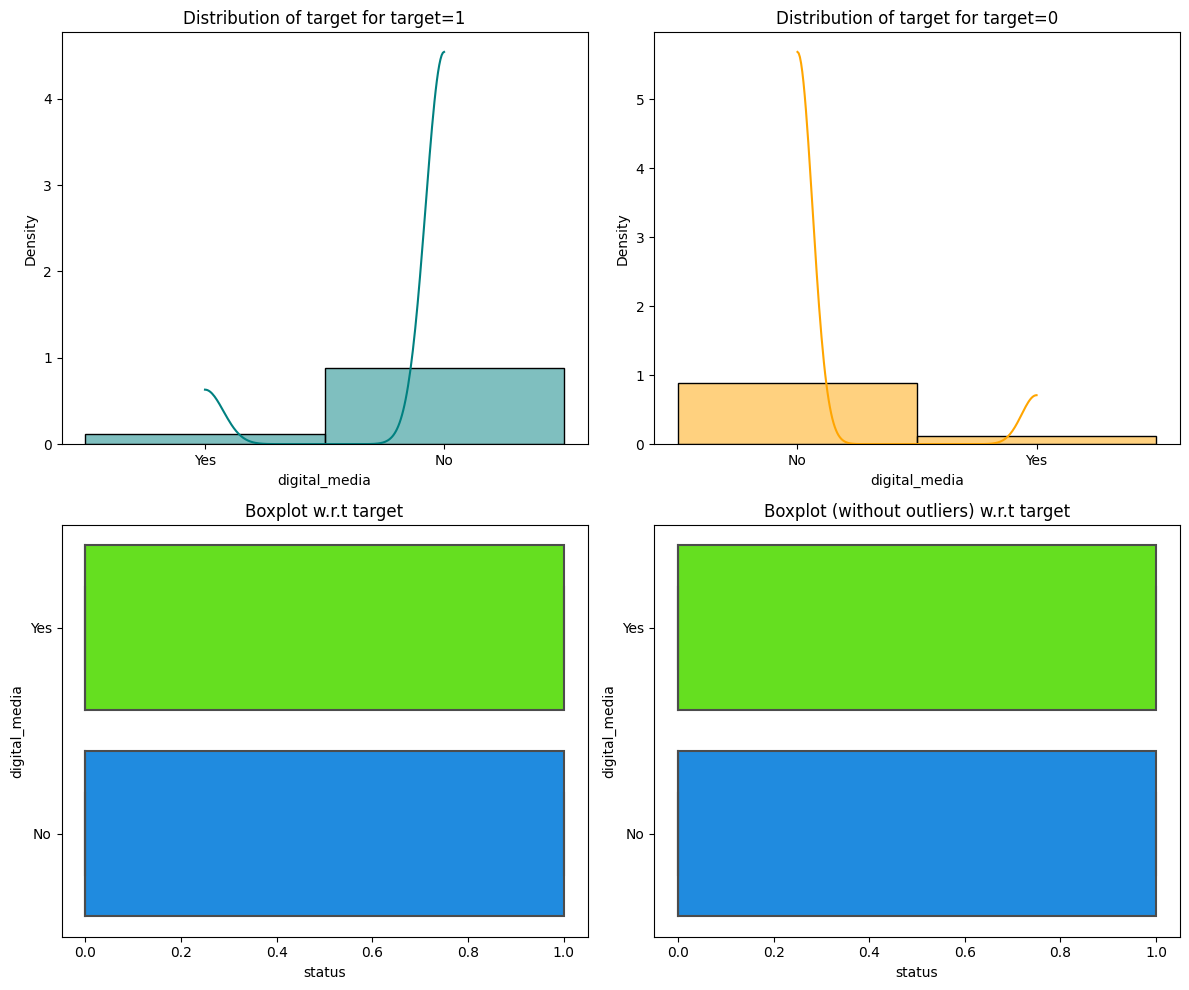

In [46]:
# Print distribution and boxplot by category
distribution_plot_wrt_target(df, "digital_media", "status")

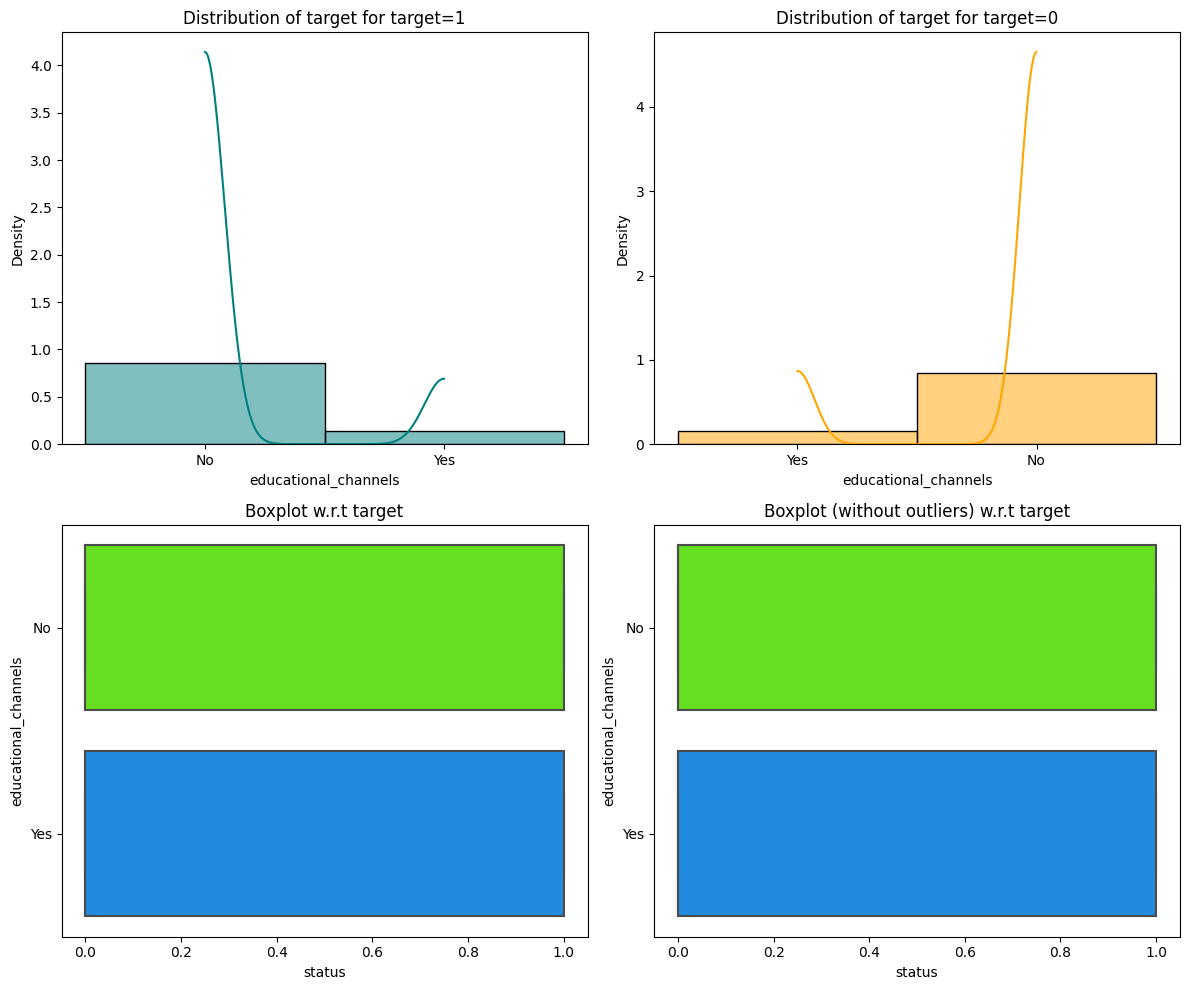

In [47]:
# Print distribution and boxplot by category
distribution_plot_wrt_target(df, "educational_channels", "status")

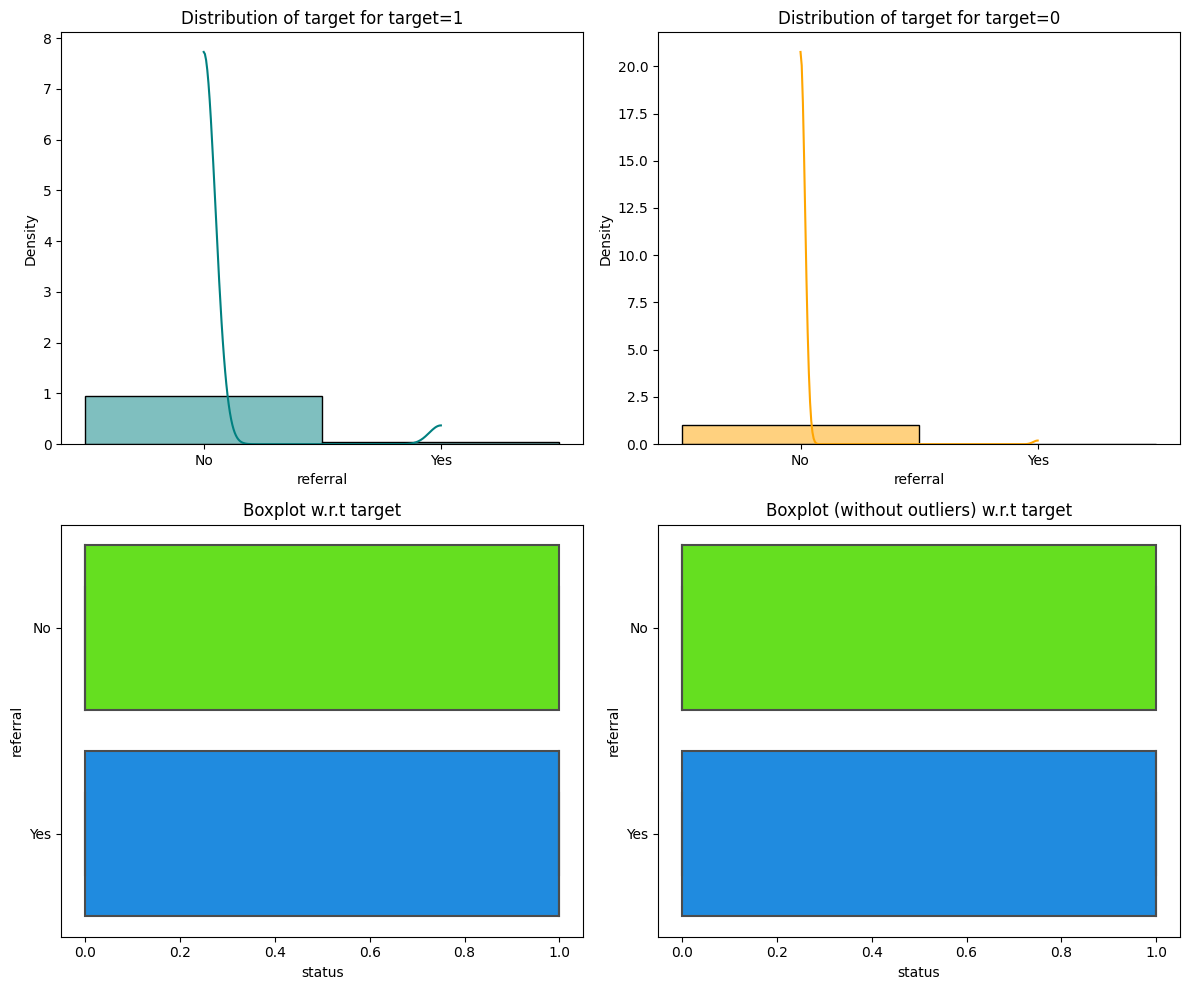

In [48]:
# Print distribution and boxplot by category
distribution_plot_wrt_target(df, "referral", "status")

**Observations:**
- Contrary to initial thought, the type of brand awareness does not have an important effect on conversion.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

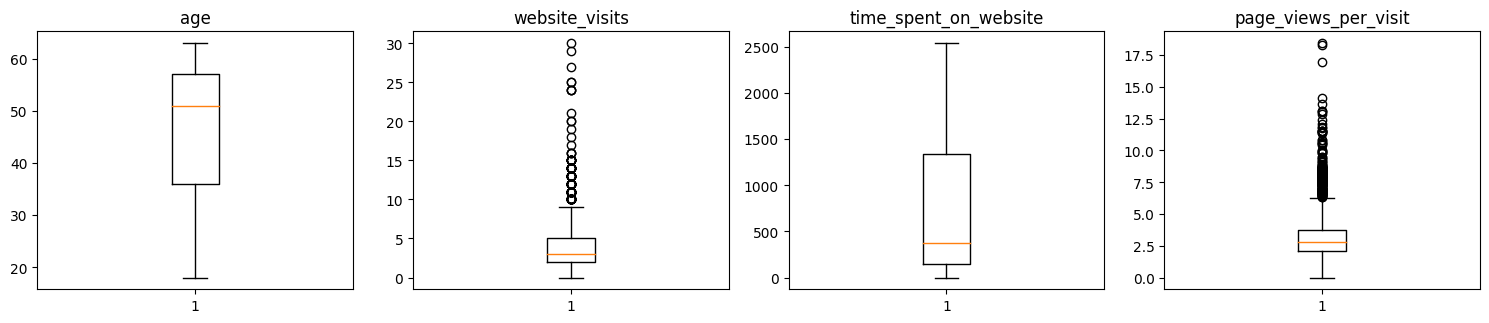

In [49]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations:**
- Website visits and page views per visit have a significant number of outliers; however, these outliers are within reasonable levels. Therefore, we are going to maintain them inside the dataset to not lose information.

In [50]:
# 'status' is the dependent (target) variable
Y = df['status']

# Drop the 'status' column from features to create X
X = df.drop(['status'], axis=1)

# Get dummies for categorical columns in X
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)


In [51]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3228, 16)
Shape of test set :  (1384, 16)
Percentage of classes in training set:
0   0.70415
1   0.29585
Name: status, dtype: float64
Percentage of classes in test set:
0   0.69509
1   0.30491
Name: status, dtype: float64


## Building a Decision Tree model

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a lead will not be converted to a paid customer in reality, the lead would have converted to a paid customer.
2. Predicting a lead will be converted to a paid customer in reality, the lead would not have converted to a paid customer.

### Which case is more important?

* If we predict that a lead will not get converted and the lead would have converted then the company will lose a potential customer.

* If we predict that a lead will get converted and the lead doesn't get converted the company might lose resources by nurturing false-positive cases.

Losing a potential customer is a greater loss.

### How to reduce the losses?

* Company would want `Recall` to be maximized, greater the Recall score higher are the chances of minimizing False Negatives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models.
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [52]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

### Building Decision Tree Model

In [53]:
d_tree = DecisionTreeClassifier(random_state=42)
d_tree.fit(X_train, y_train)

# Making predictions on the test data
y_pred = d_tree.predict(X_test)

#### Checking model performance on training set

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



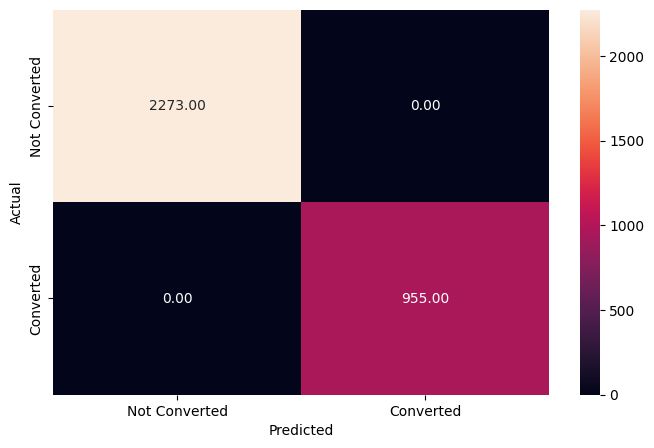

In [54]:
# Checking performance on the training data
y_pred_train1 = d_tree.predict(X_train)

# Using the metrics_score function to evaluate the model on training data
metrics_score(y_train, y_pred_train1)

# Additional observations based on the results
# You can add your own observations here based on the training data performance


**Observation:**

- The Decision tree is giving a **100% score for all metrics on the training dataset.**

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       962
           1       0.69      0.70      0.70       422

    accuracy                           0.81      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.81      0.81      0.81      1384



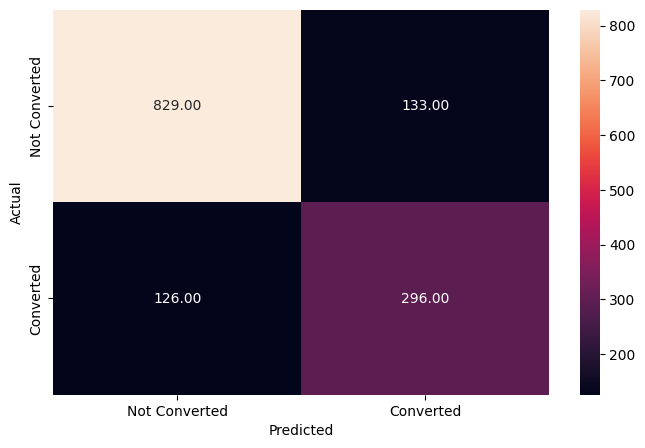

In [55]:
# Checking performance on the testing data
y_pred_test = d_tree.predict(X_test)

# Using the metrics_score function to evaluate the model on testing data
metrics_score(y_test, y_pred_test)

# Additional observations based on the results
# You can add your own observations here based on the testing data performance


**Observations:**

- The Decision Tree works well on the training data but **not so well on the test data** as the recall is 0.86 in comparison to 1 for the training dataset, i.e., the Decision Tree is overfitting the training data.
- The precision on the test data suggests that there's a 31% (1 - 0.69) chance that the model will predict that a person is going be converted even though he/she would not, and **the company may waste their time and energy on these employees who are not at risk of attrition.**
- The Recall on the test data suggests that there's a 30% (1 - 0.70) chance that the model will predict that a person is NOT going be converted even though he/she would be converted, and **the company may lose a valuable lead.**

**Let's try hyperparameter tuning using GridSearchCV to find the optimal max_depth** to reduce overfitting of the model. We can tune some other hyperparameters as well.

## Model Performance evaluation and improvement

### **Decision Tree - Hyperparameter Tuning**

We will use the class_weight hyperparameter with the value equal to {0: 0.3, 1: 0.7} which is approximately the opposite of the imbalance in the original data.

**This would tell the model that 1 is the important class here.**

In [56]:
# Choose the type of classifier
d_tree_tuned = DecisionTreeClassifier(random_state=7, class_weight={0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = make_scorer(recall_score, pos_label=1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)


DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

We have tuned the model and fit the tuned model on the training data. Now, **let's check the model performance on the training and testing data.**

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



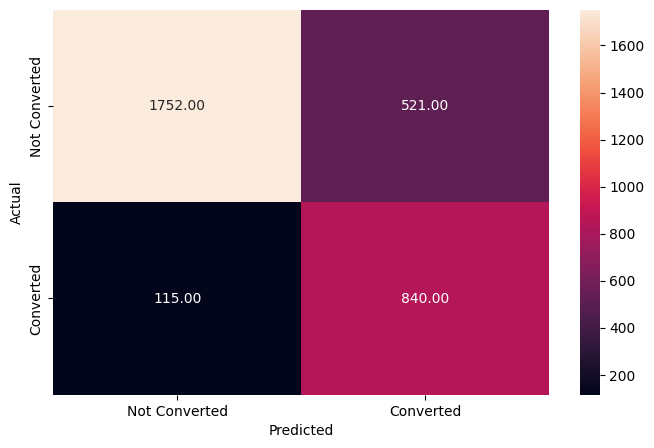

In [57]:
# Checking performance on the training data
y_pred_train2 = d_tree_tuned.predict(X_train)

# Evaluate the performance on the training data
metrics_score(y_train, y_pred_train2)


**Observations:**

- The tuned Decision Tree model demonstrates **improved recall for the converted leads (Class 1)** on the training data, which is a positive outcome. The trade-off is a **decrease in precision for Class 1**, indicating a higher risk of false positives. This shift in the balance may be acceptable depending on the business goals.

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



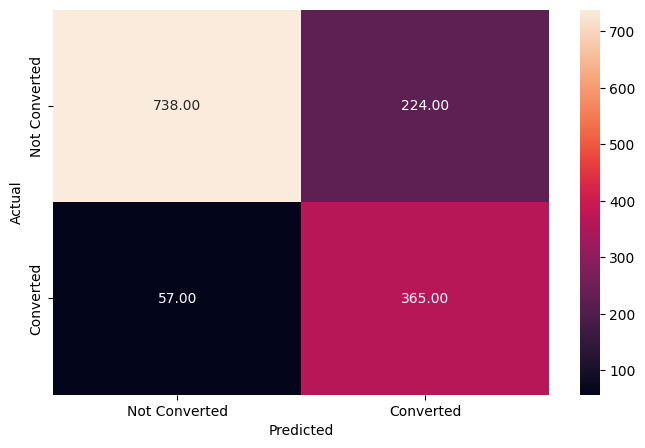

In [58]:
# Checking performance on the testing data
y_pred_test2 = d_tree_tuned.predict(X_test)

# Evaluate the performance on the testing data
metrics_score(y_test, y_pred_test2)


**Observations:**

- The tuned Decision Tree model demonstrates **improved recall for the converted leads (Class 1)** on the training data, which is a positive outcome. The trade-off is a **decrease in precision for Class 1**, indicating a higher risk of false positives. This shift in the balance may be acceptable depending on the business goals.

- The Recall on the test data suggests that there's a 14% (1 - 0.86) chance that the model will predict that a person is NOT going be converted even though he/she would be converted, and **the company may lose a valuable lead.**

### Visualizing the Decision Tree

**Let's visualize the tuned decision tree** and observe the decision rules:

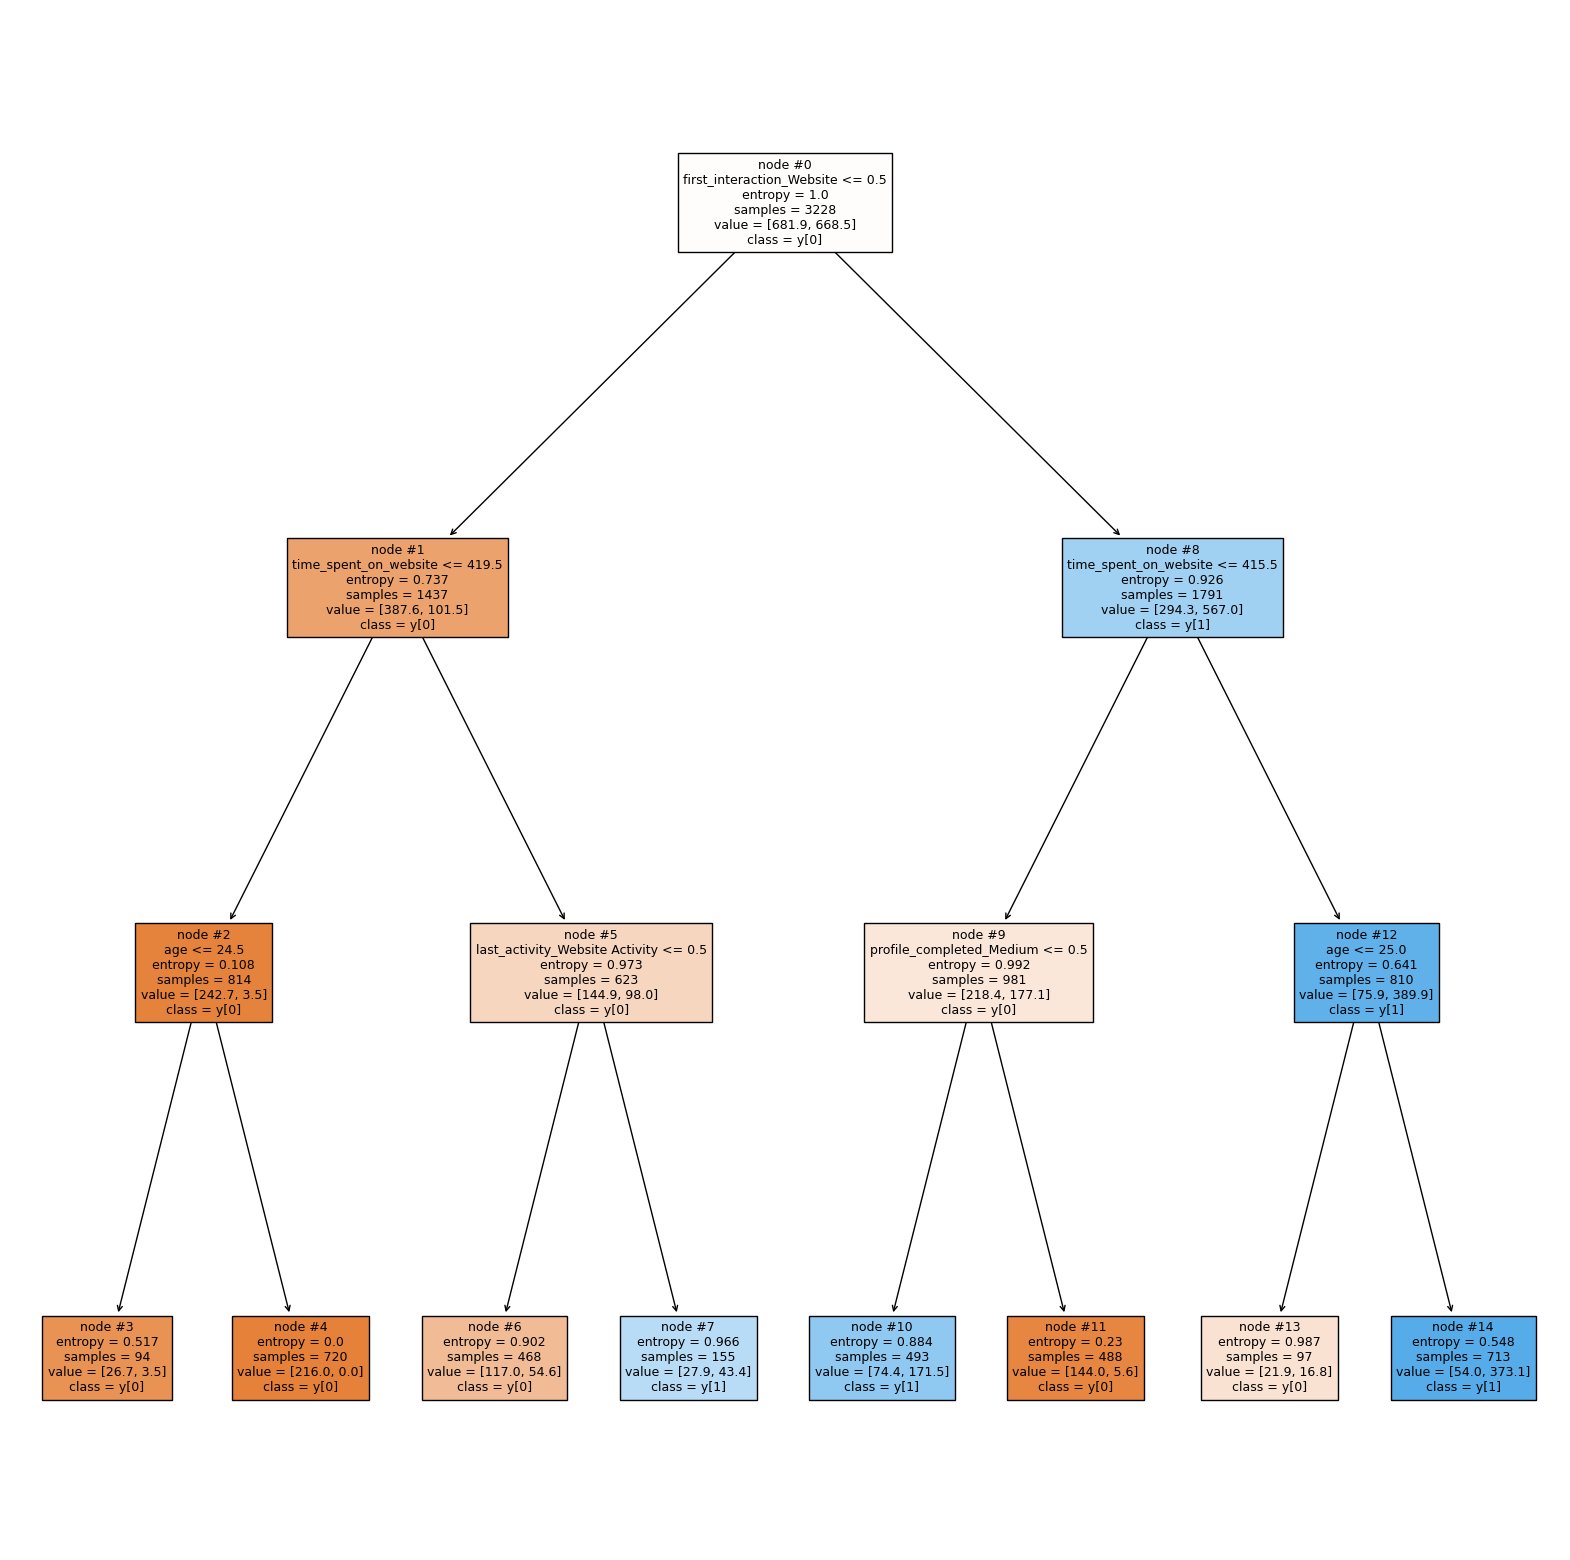

In [59]:
# Import necessary libraries
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Get the list of feature names
features = list(X.columns)

# Set the size of the plot
plt.figure(figsize = (20, 20))

# Plot the decision tree using plot_tree
tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

# Display the plot
plt.show()


**Note:** Blue leaves represent the converted leads, i.e., **y[1]**, while the orange leaves represent the not converted leads, i.e., **y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

**Observations:**

- Leads who had their first interaction via website, spend more than 415min on the website, have more than 25 years old have more likilihood to be converted.
- Leads who had NO first interaction via website, spend less than 419min on the website, have less than 24.5 years old have less likilihood to be converted.
- `Last_activity_website` also seems to have a positive relationship in predicting if a lead is likely to be converted.


**Let's look at the feature importance** of the tuned decision tree model

In [60]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
time_spent_on_website          0.34814
first_interaction_Website      0.32718
profile_completed_Medium       0.23927
age                            0.06389
last_activity_Website Activity 0.02151
website_visits                 0.00000
page_views_per_visit           0.00000
current_occupation_Student     0.00000
current_occupation_Unemployed  0.00000
profile_completed_Low          0.00000
last_activity_Phone Activity   0.00000
print_media_type1_Yes          0.00000
print_media_type2_Yes          0.00000
digital_media_Yes              0.00000
educational_channels_Yes       0.00000
referral_Yes                   0.00000


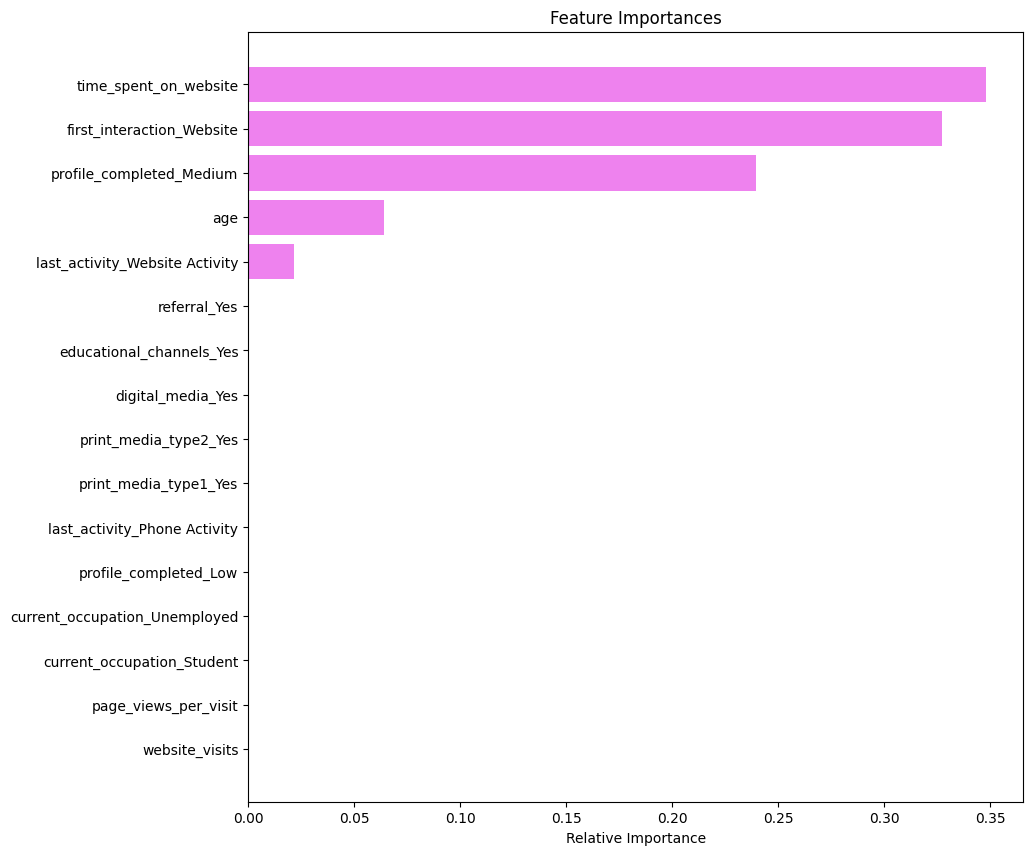

In [61]:
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()


**Observations:**

- After tuning the model, we are getting that only 5 features are important. It seems like **the model is having some bias**, as it has over-simplified the problem and is not capturing the patterns associated with other variables.
- According to this model too, `Time_spend_on_website`, `First_interaction_website`, `Profile_completed_medium`, `age`, and `Last_activity_website ` are the 5 most important features that describe why a lead is converted, which might imply that website leads may have a better buy experience and then the marketing efforts could be directed to them.




## Building a Random Forest model

In [62]:
# Choose the number of estimators (trees) based on your requirements
n_estimators = 100  # You can adjust this number

# Create the Random Forest classifier
rf_estimator = RandomForestClassifier(n_estimators=n_estimators, random_state=42, class_weight={0: 0.3, 1: 0.7})

# Fit the Random Forest classifier to the training data
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



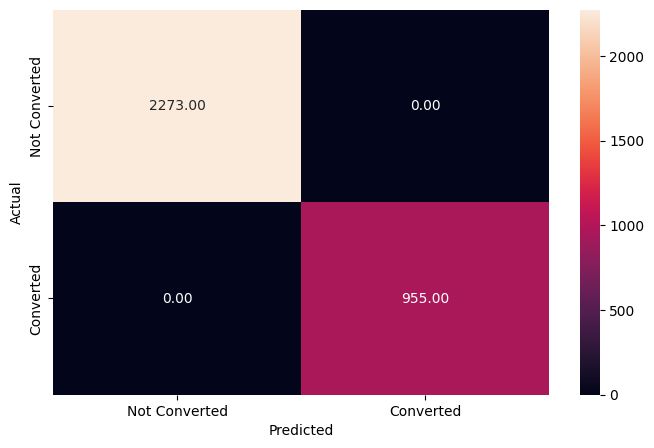

In [63]:
# Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)

# Evaluate the performance on the training data
metrics_score(y_train, y_pred_train3)


**Observation:**

- The Random Forest is giving a **100% score for all metrics on the training dataset.**

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       962
           1       0.80      0.68      0.73       422

    accuracy                           0.85      1384
   macro avg       0.83      0.80      0.81      1384
weighted avg       0.85      0.85      0.85      1384



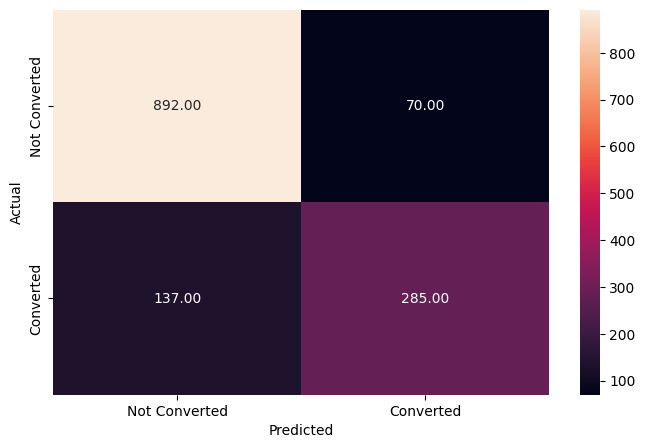

In [64]:
# Checking performance on the testing data
y_pred_test3 = rf_estimator.predict(X_test)

# Evaluate the performance on the testing data
metrics_score(y_test, y_pred_test3)


**Observations:**

- The Random Forest classifier **seems to be overfitting the training data**. The recall on the training data is 1, while the recall on the test data is only ~ 0.68 for class 1.
- Precision is higher in the initial Random forest model than in decision tree model; however, Recall on the test data suggests that there's a 32% (1 - 0.68) chance that the model will predict that a person is NOT going be converted even though he/she would be converted, and **the company may lose a valuable lead.**


## Model Performance evaluation and improvement

### **Random Forest Classifier - Hyperparameter Tuning**

Let's try **tuning some of the important hyperparameters of the Random Forest Classifier**.

We will **not** tune the `criterion` hyperparameter as we know from hyperparameter tuning for decision trees that `entropy` is a better splitting criterion for this data.

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion="entropy", random_state=7)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced", {0: 0.3, 1: 0.7}]
}

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(
    estimator=rf_estimator_tuned,
    param_grid=parameters,
    scoring=scorer,
    cv=5
)

grid_obj = grid_obj.fit(X_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best estimator to the training data
rf_estimator_tuned.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=120, random_state=7)

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2273
           1       0.68      0.87      0.76       955

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.84      3228



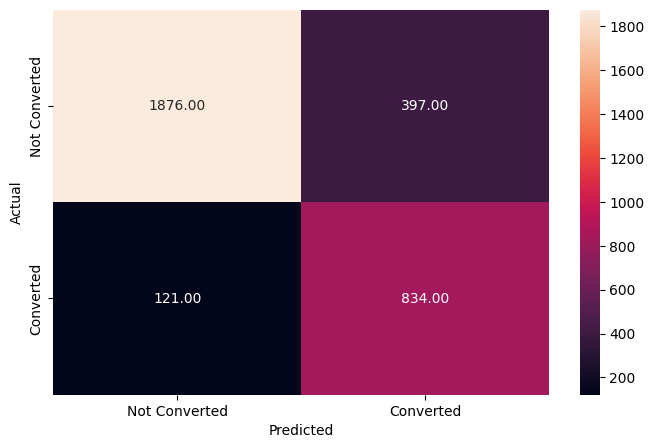

In [66]:
# Checking performance on the training data
y_pred_train4 = rf_estimator_tuned.predict(X_train)

# Evaluate the performance on the training data
metrics_score(y_train, y_pred_train4)


              precision    recall  f1-score   support

           0       0.93      0.83      0.87       962
           1       0.68      0.85      0.76       422

    accuracy                           0.83      1384
   macro avg       0.81      0.84      0.82      1384
weighted avg       0.85      0.83      0.84      1384



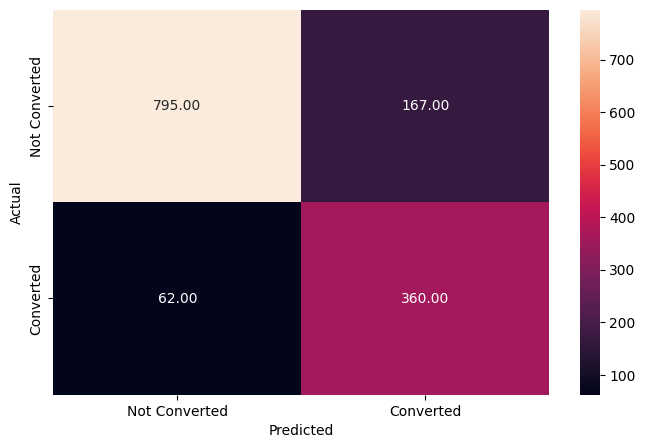

In [67]:
# Checking performance on the test data
y_pred_test4 = rf_estimator_tuned.predict(X_test)

# Evaluate the performance on the test data
metrics_score(y_test, y_pred_test4)


**Observations:**

- The Tuned Random Forest classifier **do not overfit the training data**. The recall on the training data is ~ 0.85, while the recall on the test data is ~ 0.85 for class 1.
- Precision is lower in the Tuned Random forest model than in the original Random Forest as a tradeoff of increasing recall; in the Tuned Random forest,  Recall on the test data suggests that there's a 15% (1 - 0.85) chance that the model will predict that a person is NOT going be converted even though he/she would be converted. **This means a 17% recall improvement.**


**One of the drawbacks of ensemble models is that we lose the ability to obtain an interpretation of the model. We cannot observe the decision rules for random forests the way we did for decision trees. So, let's just check the feature importance of the model.**

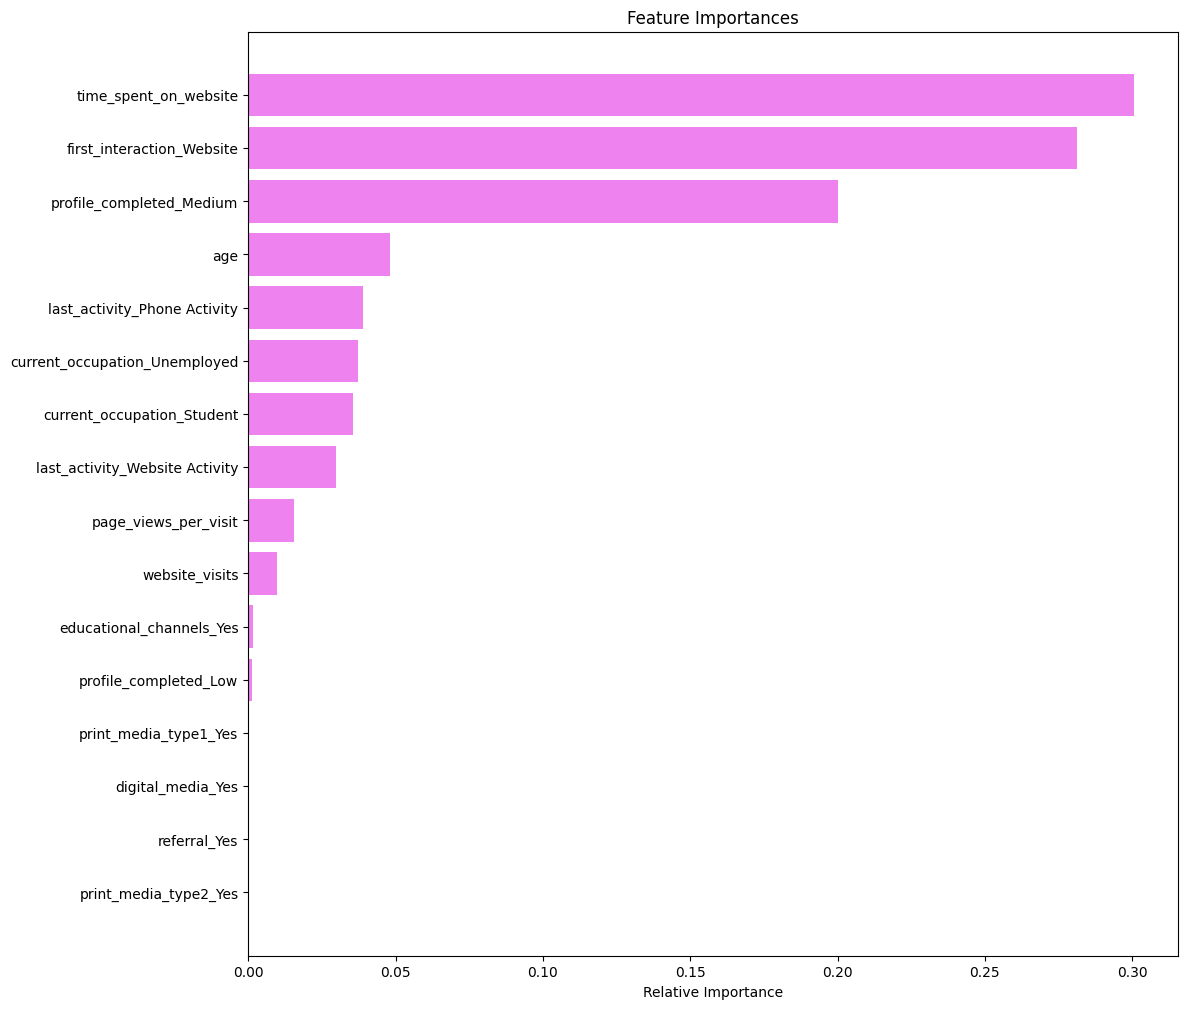

In [68]:
# Get feature importances from a tuned Random Forest estimator (rf_estimator_tuned)
importances = rf_estimator_tuned.feature_importances_

# Sort the indices of importances in ascending order
indices = np.argsort(importances)

# Get the names of the features from the input data (X)
feature_names = list(X.columns)

# Create a horizontal bar plot to visualize feature importances
plt.figure(figsize=(12, 12))

# Set the title of the plot
plt.title('Feature Importances')

# Plot horizontal bars with the relative importance of each feature
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')

# Set y-axis ticks with feature names based on the sorted indices
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

# Label for x-axis
plt.xlabel('Relative Importance')

# Display the plot
plt.show()

**Observations:**

- The Random Forest further verifies the results from the decision tree that the most important features are `time_spend_website`, `firstinteraction_website`, `Profile_completed_Medium` and `age`.
- We can say that the people appear to be buying the courses when the marketing interaction is view website and they are more than 25 years old, so they are able to pay for the course.
- Current_ocupation_student has also some importance, sutdents could be focused on finishing their degrees and therefore they could have less interest in ExtraLearn programs.
- Other features such as last activity phone and current acupation unemployed also play a crucial role in knowing whether a lead will be converted or not.


## **Additional Optimization**

## **Boosting Models**

Let's now look at the other kind of Ensemble technique knowns as Boosting

### **XGBoost**
- XGBoost stands for Extreme Gradient Boosting.
- XGBoost is a tree-based ensemble machine learning technique that improves prediction power and performance by improvising on the Gradient Boosting framework and incorporating reliable approximation algorithms. It is widely utilized and routinely appears at the top of competition leader boards in data science.

In [69]:
# Installing the xgboost library using the 'pip' command.
!pip install xgboost

In [70]:
# Importing the AdaBoostClassifier and GradientBoostingClassifier [Boosting]
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# Importing the XGBClassifier from the xgboost library
from xgboost import XGBClassifier

Let’s try Adaboost Classifier, Gradient Boost Classifier and XGBoost Classifier with original weights and with modified weights {0: 0.3, 1: 0.7}

# Adaboost Classifier

              precision    recall  f1-score   support

           0       0.91      0.79      0.85       962
           1       0.63      0.81      0.71       422

    accuracy                           0.80      1384
   macro avg       0.77      0.80      0.78      1384
weighted avg       0.82      0.80      0.80      1384



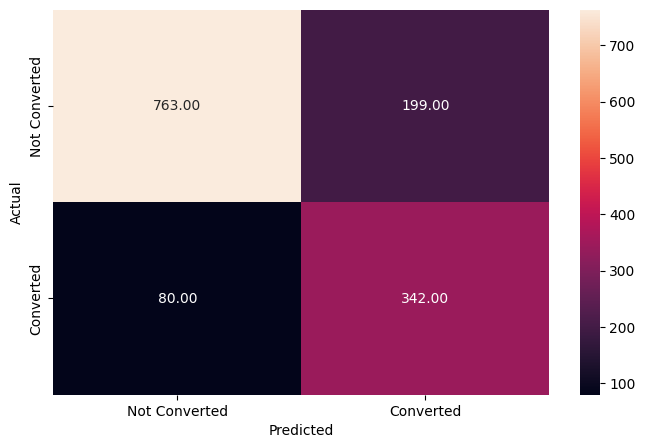

In [82]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Adaboost Classifier
y_pred_adaboost = adaboost_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred_adaboost)
conf_matrix = confusion_matrix(y_test, y_pred_adaboost)
class_report = classification_report(y_test, y_pred_adaboost)

# Make predictions on the test set
y_pred_adaboost = adaboost_model.predict(X_test)

# Evaluate performance using your metrics_score function
metrics_score(y_test, y_pred_adaboost)



**Observations:**

* **The Adaboost Classifier with original weights model does not improve the recall results.**

              precision    recall  f1-score   support

           0       0.91      0.79      0.85       962
           1       0.63      0.81      0.71       422

    accuracy                           0.80      1384
   macro avg       0.77      0.80      0.78      1384
weighted avg       0.82      0.80      0.80      1384



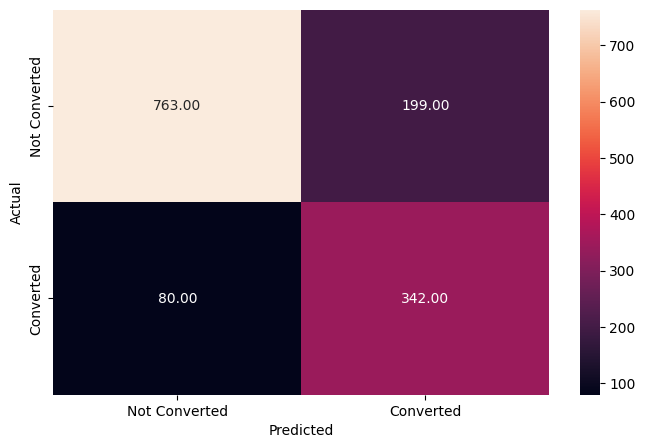

In [74]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Specify the class weights
class_weights = {0: 0.3, 1: 0.7}

# Create AdaBoost Classifier
adaboost_model = AdaBoostClassifier()

# Set sample weights based on class weights
sample_weights = np.array([class_weights[y] for y in y_train])

# Fit the model with sample weights
adaboost_model.fit(X_train, y_train, sample_weight=sample_weights)

# Make predictions on the test set
y_pred_adaboost = adaboost_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred_adaboost)
conf_matrix = confusion_matrix(y_test, y_pred_adaboost)
class_report = classification_report(y_test, y_pred_adaboost)

# Make predictions on the test set
y_pred_adaboost = adaboost_model.predict(X_test)

# Evaluate performance using your metrics_score function
metrics_score(y_test, y_pred_adaboost)


**Observations:**

* **The Adaboost Classifier with modified weights model does not improve the recall results.**

# Gradient Boost Classifier

              precision    recall  f1-score   support

           0       0.94      0.84      0.89       962
           1       0.71      0.87      0.78       422

    accuracy                           0.85      1384
   macro avg       0.82      0.86      0.83      1384
weighted avg       0.87      0.85      0.85      1384



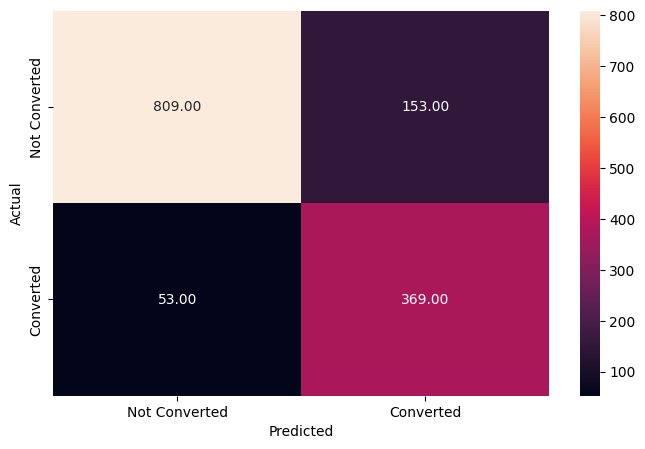

In [81]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Gradient Boost Classifier
y_pred_gbc = gbc.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred_gbc)
conf_matrix = confusion_matrix(y_test, y_pred_gbc)
class_report = classification_report(y_test, y_pred_gbc)

# Make predictions on the test set
y_pred_gbc = gbc.predict(X_test)

# Evaluate performance using your metrics_score function
metrics_score(y_test, y_pred_gbc)



**Observations:**

* **The Gradient Boost Classifier model with original weights does not improve the recall results.**

              precision    recall  f1-score   support

           0       0.94      0.84      0.89       962
           1       0.71      0.87      0.78       422

    accuracy                           0.85      1384
   macro avg       0.82      0.86      0.83      1384
weighted avg       0.87      0.85      0.85      1384



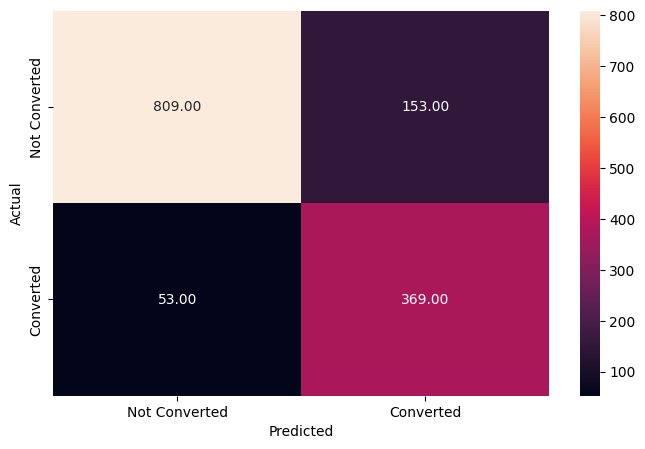

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Specify the class weights
class_weights = {"balanced": None, 0: 0.3, 1: 0.7}

# Create Gradient Boosting Classifier
gbc = GradientBoostingClassifier()

# Set sample weights based on class weights
sample_weights = np.array([class_weights[y] for y in y_train])

# Fit the model with sample weights
gbc.fit(X_train, y_train, sample_weight=sample_weights)

# Make predictions on the test set
y_pred_gbc_mw = gbc.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred_gbc_mw)
conf_matrix = confusion_matrix(y_test, y_pred_gbc_mw)
class_report = classification_report(y_test, y_pred_gbc_mw)

# Make predictions on the test set
y_pred_gbc_mw = gbc.predict(X_test)

# Evaluate performance using your metrics_score function
metrics_score(y_test, y_pred_gbc_mw)



**Observations:**

* **The Gradient Boost Classifier model with modified weights improves the recall results to 0.87 for class 1.**
- **Additionally, The Gradient Boost Classifier model with modified weights has a high f1-score for class 1: 0.78 and for class 0 :0.89. These results are better than the Tuned decision tree which has f1-score for class 1: 0.72 and for class 0 :0.84**




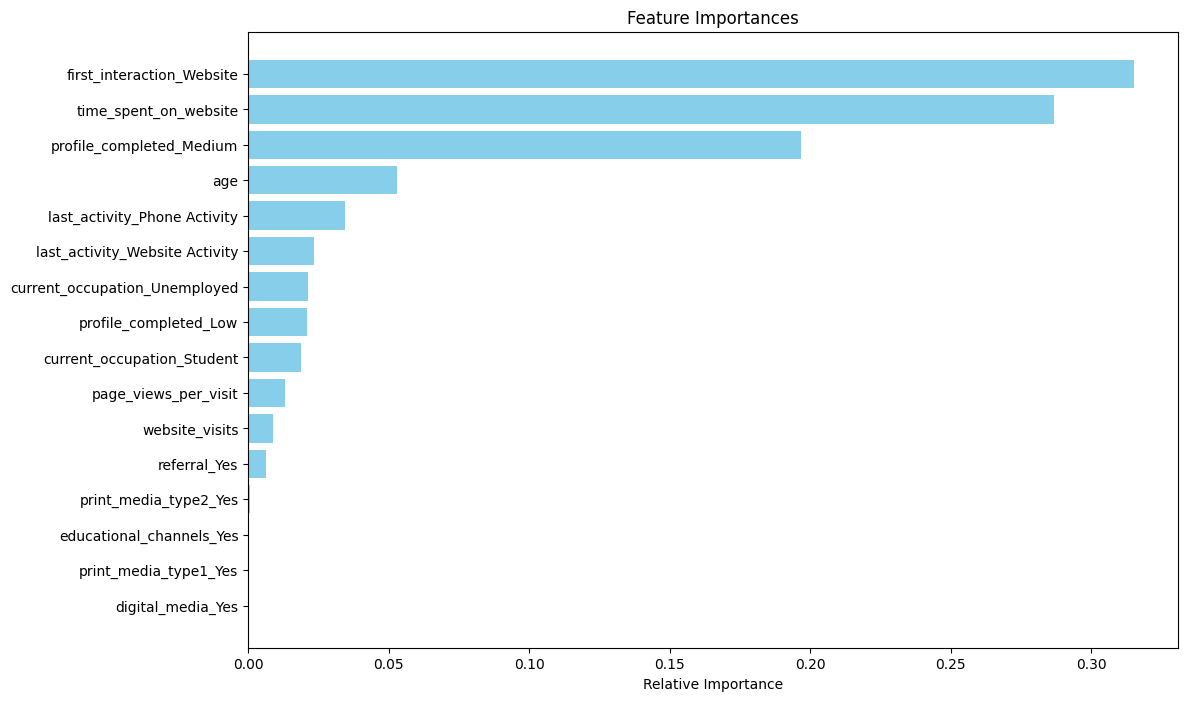

In [80]:
import matplotlib.pyplot as plt

# Extract feature importances
importances = gbc.feature_importances_

# Sort indices based on importance
indices = np.argsort(importances)

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
plt.barh(range(len(indices)), importances[indices], color='skyblue', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importances')
plt.show()




**Observations:**

- The Gradient Boost Classifier model with modified weights further verifies the results from the decision tree and Tuned Random forest that the most important features are `firstinteraction_website`, `time_spend_website`, `Profile_completed_Medium` and `age`.

- We can say that the people appear to be buying the courses when the marketing interaction is via website, and they are more than 25 years old perhaps older people are able to pay for the course easily.

- Current_ocupation_student also has some importance; students could focus on finishing their degrees and therefore they could have less interest in ExtraLearn programs.

- Other features such as last activity phone, last activity website and current occupation unemployed also play a crucial role in knowing whether a lead will be converted or not.


# XGBoost Classifier

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       962
           1       0.79      0.71      0.75       422

    accuracy                           0.85      1384
   macro avg       0.83      0.81      0.82      1384
weighted avg       0.85      0.85      0.85      1384



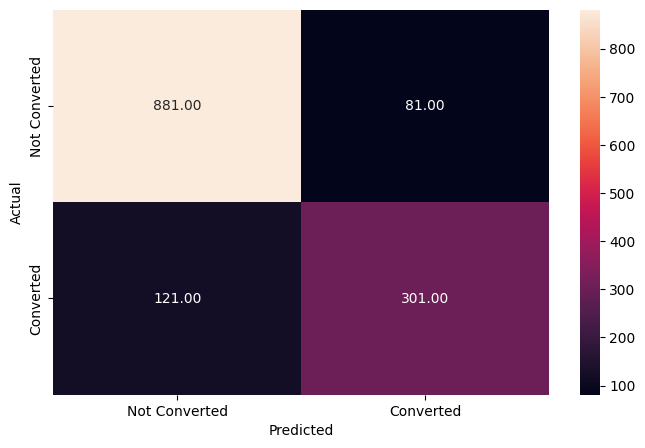

In [79]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# XGBoost Classifier
xgb = XGBClassifier(random_state=1, eval_metric='logloss')

# Fitting the model
xgb.fit(X_train, y_train)

# Model Performance on the test data
y_pred_xgb = xgb.predict(X_test)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred_xgb)
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
class_report = classification_report(y_test, y_pred_xgb)

# Model Performance on the test data
y_pred_xgb = xgb.predict(X_test)

# Evaluate performance using your metrics_score function
metrics_score(y_test, y_pred_xgb)


              precision    recall  f1-score   support

           0       0.87      0.92      0.89       962
           1       0.79      0.68      0.73       422

    accuracy                           0.85      1384
   macro avg       0.83      0.80      0.81      1384
weighted avg       0.84      0.85      0.84      1384



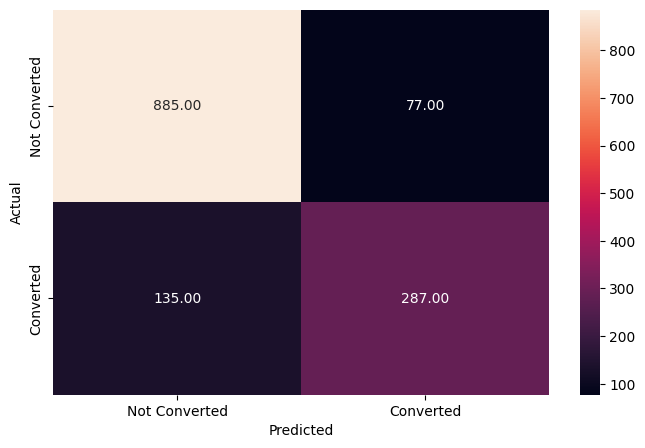

In [78]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Specify the class weights
class_weights = {0: 0.3, 1: 0.7}

# Create XGBoost Classifier
xgb = XGBClassifier(random_state=1, eval_metric='logloss', scale_pos_weight=class_weights[1])

# Fitting the model
xgb.fit(X_train, y_train)

# Model Performance on the test data
y_pred_xgb = xgb.predict(X_test)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred_xgb)
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
class_report = classification_report(y_test, y_pred_xgb)

# Model Performance on the test data
y_pred_xgb = xgb.predict(X_test)

# Evaluate performance using your metrics_score function
metrics_score(y_test, y_pred_xgb)


**Observations:**

* **The XGBoost model does not improve the recall results.**

**Observations on Boosting Models:**

- **The Gradient Boost Classifier model with modified weights improves the recall results to 0.87 for class 1.**
- **The Gradient Boost Classifier and The Tuned decision tree models give the best performance for this dataset with a recall of 0.87, and 0.86 respectively.**
- **Additionally, The Gradient Boost Classifier model with modified weights has a high f1-score for class 1: 0.78 and for class 0 :0.89. These results are better than the Tuned decision tree which has f1-score for class 1: 0.72 and for class 0 :0.84.**



## Actionable Insights and Recommendations

## **Conclusions**

## **Conclusion**

- The best model we have got so far is the Gradient Boost Classifier model with modified weights which is giving nearly ~ 87% recall for class 1 on the test data.
- The company should use this model to know beforehand which lead is going to be converted and act accordingly.
-  `firstinteraction_website`, `time_spend_website`, `Profile_completed_Medium` and `age`seem to be the most important features.
- The overall lead conversion rate is 29.9%, which provides a baseline to compare against.
- Leads who first interact via the website have significantly higher conversion rates (45.6%) compared to mobile app (10.5%). Focusing marketing and resources on driving more website traffic could improve overall conversion.
- Time spent on the website is highly correlated with conversion, with converted leads spending a median of 789 mins vs 317 mins for non-converts. Keeping leads engaged onsite longer should increase conversion likelihood.


## **Recommendations**

## **Recommendations**

- Since time spent on the website emerged as the most important factor in predicting lead conversion, ExtraLearn should prioritize marketing strategies
that engage visitors and extend their website session lengths:

    1. Optimize site architecture and navigation to make it easy for visitors to find relevant content and navigate to related topics/pages. This encourages further exploration.
    2. Implement advanced tracking analytics to identify popular site content as well as pages with high exit rates. Refine or enhance high-interest areas; modify or remove content that fails to engage.
    3. Integrate interactive elements like assessments, quizzes, calculators, etc. that lead visitors to spend more time providing information relevant to course matching.
    4. Retarget visitors via ads/email campaigns who leave the site before hitting key engagement thresholds personalized to vertical/offering. Remind them of content still to explore.
    5. Test modular course content samples accessible to visitors without requiring lead forms upfront. This demonstrates value from courses before asking for visitor info.

  The core focus should be providing sticky website experiences tailored to visitor vertical/persona that drive session times upward and subsequently increase the likelihood of lead conversion. An integrated analytics and testing framework will enable iterating on the most effective engagement strategies over time.

- Given the goal is to maximize conversion of potential customers, continue using the Gradient Boosting model in production to score incoming leads. Use the lead scores to focus sales efforts on those most likely to convert.
- Put additional resources into the website experience, features, content etc to drive longer session times. This has a direct impact on conversion.
- Analyze what web pages and content converts spend more time on and identify opportunities to better engage them during the session.
- Establish feedback loops to continually collect data on new leads, retrain models periodically, and improve conversion performance over time.
- Set up A/B testing frameworks to test changes to web pages, outreach campaigns, pricing models etc. and their impact on conversion rates.